In [2]:
cd drive/MyDrive/TFM/dataset/

/content/drive/MyDrive/TFM/dataset


In [3]:
ls

 10cytoplasmic_hairiness/      dataset_finetuning2.gsheet
 11cerebriform_nucleus/        dataset_finetuning.csv
 12cytoplasmic_size/           dataset_image_text2.csv
 1cell_size/                   dataset_image_text2.gsheet
 2NCratio/                     dataset_image_text.csv
 3nuclear_size/                df_wide_first2.xlsx
 4nuclear_shape/               Listas/
 5nucleolus/                  'Llista categories.gsheet'
 6nuclear_excentration/        logs_contrastive/
 7chromatin_density/           test_split.csv
 8cytoplasmic_basophilia/      train_split.csv
 9cytoplasmic_granulation/     train_split.gsheet
 cell_by_categories.zip        val_split.csv
 clip_finetuned_contrastive/   val_split.gsheet
 clip_finetuned_triplet/       wandb/
 dataset_finetuning2.csv


In [16]:
import pandas as pd
from pathlib import Path

In [7]:
p = Path("/content/drive/MyDrive/TFM/dataset")

In [8]:
imagenes = []
numero = 0
for i in p.rglob('*.jpg*'):
  numero += 1
  imagenes.append(((i.name, i.parent, i.parent.parent.name, i.parent.name)))

columns=["Nombre_imagen", "Ruta_imagen", "Descriptor", "Clase"]
df = pd.DataFrame(imagenes, columns=columns)

df.head()

,Nombre_imagen,Ruta_imagen,Descriptor,Clase
0,BL_12176525.jpg,/content/drive/MyDrive/TFM/dataset/1cell_size/3,1cell_size,3
1,BL_12176444.jpg,/content/drive/MyDrive/TFM/dataset/1cell_size/3,1cell_size,3
2,BL_12176428.jpg,/content/drive/MyDrive/TFM/dataset/1cell_size/3,1cell_size,3
3,BL_12176413.jpg,/content/drive/MyDrive/TFM/dataset/1cell_size/3,1cell_size,3
4,PC_1738155.jpg,/content/drive/MyDrive/TFM/dataset/1cell_size/3,1cell_size,3


In [9]:
df_wide_first = df.pivot_table(index="Nombre_imagen", columns="Descriptor", values="Clase", aggfunc='first')
df_wide_last = df.pivot_table(index="Nombre_imagen", columns="Descriptor", values="Clase", aggfunc='last')
# fill nans with zero
df_wide_first = df_wide_first.fillna(0)
df_wide_last = df_wide_last.fillna(0)
display((df_wide_last != df_wide_first).any(axis=1))

# get indices of rows that have different values for last and first
indices = df_wide_last[df_wide_last.ne(df_wide_first, axis=0).any(axis=1)].index
indices

print("First")
display(df_wide_first.loc[indices])
print("Last")
display(df_wide_last.loc[indices])

,0
Nombre_imagen,
198.jpg,False
224.jpg,False
25.jpg,False
26.jpg,False
30.jpg,False
...,...
VLY_99334.jpg,True
VLY_99350.jpg,False
VLY_9964272.jpg,False


First


Descriptor,10cytoplasmic_hairiness,11cerebriform_nucleus,12cytoplasmic_size,1cell_size,2NCratio,3nuclear_size,4nuclear_shape,5nucleolus,6nuclear_excentration,7chromatin_density,8cytoplasmic_basophilia,9cytoplasmic_granulation
Nombre_imagen,,,,,,,,,,,,
HC_3526166.jpg,2,1,3,0,1,2,1,0,0,0,1,1
LY_83198.jpg,0,1,2,3,2,2,0,1,2,0,2,2
LY_83212.jpg,0,1,2,3,2,2,0,1,0,0,2,2
VLY_54776.jpg,1,0,3,0,1,0,2,0,2,0,3,0
VLY_99334.jpg,0,0,3,0,1,0,0,0,0,0,3,0


Last


Descriptor,10cytoplasmic_hairiness,11cerebriform_nucleus,12cytoplasmic_size,1cell_size,2NCratio,3nuclear_size,4nuclear_shape,5nucleolus,6nuclear_excentration,7chromatin_density,8cytoplasmic_basophilia,9cytoplasmic_granulation
Nombre_imagen,,,,,,,,,,,,
HC_3526166.jpg,2,1,3,0,2,2,1,0,0,0,1,1
LY_83198.jpg,0,1,3,3,2,2,0,1,2,0,2,2
LY_83212.jpg,0,1,3,3,2,2,0,1,0,0,2,2
VLY_54776.jpg,1,0,3,0,2,0,2,0,2,0,3,0
VLY_99334.jpg,0,0,3,0,2,0,0,0,0,0,3,0


In [20]:
sum((df_wide_last != df_wide_first).any(axis=1))

5

In [10]:
df_wide_first = df.pivot_table(index="Nombre_imagen", columns="Descriptor", values="Clase", aggfunc='first')

df_wide_first = df_wide_first.fillna(0)
df_wide_first_one = df_wide_first.applymap(lambda y: 1 if y != 0 else 0)
df_wide_first_one.head()

<ipython-input-10-f3f7587bb18d>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_wide_first_one = df_wide_first.applymap(lambda y: 1 if y != 0 else 0)


Descriptor,10cytoplasmic_hairiness,11cerebriform_nucleus,12cytoplasmic_size,1cell_size,2NCratio,3nuclear_size,4nuclear_shape,5nucleolus,6nuclear_excentration,7chromatin_density,8cytoplasmic_basophilia,9cytoplasmic_granulation
Nombre_imagen,,,,,,,,,,,,
198.jpg,0,0,1,0,0,0,0,0,0,0,0,0
224.jpg,0,0,1,0,0,0,0,0,0,0,0,0
25.jpg,0,0,1,0,0,0,0,0,0,0,0,0
26.jpg,0,0,1,0,0,0,0,0,0,0,0,0
30.jpg,0,0,1,0,0,0,0,0,0,0,0,0


In [11]:
descript_sum = df_wide_first_one.sum(axis=1)
display(descript_sum)

,0
Nombre_imagen,
198.jpg,1
224.jpg,1
25.jpg,1
26.jpg,1
30.jpg,1
...,...
VLY_99334.jpg,3
VLY_99350.jpg,1
VLY_9964272.jpg,3


In [13]:
# prompt: hacer la suma total de los números contenidos en la segunda columna de descript_sum

total_sum = descript_sum.sum()
print(f"La suma total de los números en la segunda columna de descript_sum es: {total_sum}")


La suma total de los números en la segunda columna de descript_sum es: 3300


In [14]:
# prompt: hacer la suma total de los números contenidos en la segunda columna más 1 en todas las filas de descript_sum

# Assuming 'descript_sum' is already defined as in the provided code


total_sum_plus_one = (descript_sum + 1).sum()
print(f"La suma total de los números en la segunda columna de descript_sum más 1 es: {total_sum_plus_one}")


La suma total de los números en la segunda columna de descript_sum más 1 es: 4770


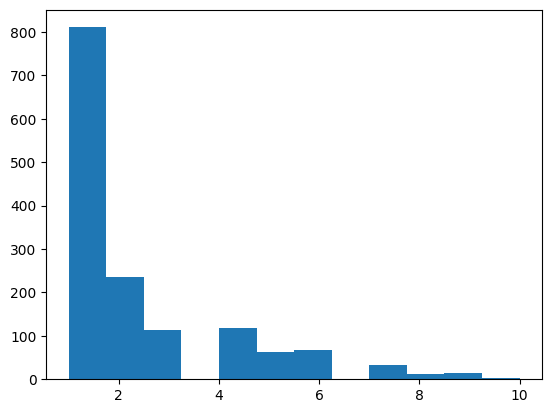

In [23]:
#plot histogram of ivana
import matplotlib.pyplot as plt
plt.hist(descript_sum, bins=12)
plt.show()

In [24]:
#Añadir la información de la subcarpeta a la que pertence cada imagen como columna dentro de cada descriptor
df_wide_first = df.pivot_table(index="Nombre_imagen", columns=["Descriptor", "Clase"], values="Clase", aggfunc='first')
df_wide_first = df_wide_first.fillna(0)
df_wide_first = df_wide_first.applymap(lambda y: 1 if y != 0 else 0)
df_wide_first.tail()

<ipython-input-24-afc2272e19ac>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_wide_first = df_wide_first.applymap(lambda y: 1 if y != 0 else 0)


Descriptor      10cytoplasmic_hairiness    11cerebriform_nucleus     \
Clase                                 1  2                     1  2   
Nombre_imagen                                                         
VLY_99334.jpg                         0  0                     0  0   
VLY_99350.jpg                         0  0                     0  0   
VLY_9964272.jpg                       0  0                     0  0   
VLY_9964300.jpg                       0  0                     0  0   
VLY_9969680.jpg                       0  0                     0  0   

Descriptor      12cytoplasmic_size       1cell_size        ...  \
Clase                            1  2  3          1  2  3  ...   
Nombre_imagen                                              ...   
VLY_99334.jpg                    0  0  1          0  0  0  ...   
VLY_99350.jpg                    0  0  0          0  0  0  ...   
VLY_9964272.jpg                  0  0  0          0  0  0  ...   
VLY_9964300.jpg                  0  0  1          0  0  0  ...   
VLY_9969680.jpg                  0  0  1          0  0  0  ...   

Descriptor      7chromatin_density          8cytoplasmic_basophilia           \
Clase                            1  2  3  4                       1  2  3  4   
Nombre_imagen                                                                  
VLY_99334.jpg                    0  0  0  0                       0  0  1  0   
VLY_99350.jpg                    0  0  0  0                       0  0  0  0   
VLY_9964272.jpg                  0  0  0  0                       0  0  1  0   
VLY_9964300.jpg                  0  0  0  0                       0  0  0  1   
VLY_9969680.jpg                  0  0  0  0                       0  0  1  0   

Descriptor      9cytoplasmic_granulation     
Clase                                  1  2  
Nombre_imagen                                
VLY_99334.jpg                          0  0  
VLY_99350.jpg                          0  0  
VLY_9964272.jpg                        0  0  
VLY_9964300.jpg                        0  0  
VLY_9969680.jpg                        0  0  

[5 rows x 34 columns]

In [ ]:
#Exportar df a tabla de excel
df_wide_first.to_excel("df_wide_first.xlsx")


In [ ]:
#Exportar ivana a excel
descript_sum.to_excel("descript_sum.xlsx")

**2a parte**

In [8]:
cd dataset/

/content/drive/MyDrive/TFM/dataset


In [22]:
ls

 10cytoplasmic_hairiness/    dataset_finetuning2.csv
 11cerebriform_nucleus/      dataset_finetuning2.gsheet
 12cytoplasmic_size/         dataset_finetuning.csv
 1cell_size/                 dataset_image_text2.csv
 2NCratio/                   dataset_image_text2.gsheet
 3nuclear_size/              dataset_image_text.csv
 4nuclear_shape/             df_wide_first2.xlsx
 5nucleolus/                 Listas/
 6nuclear_excentration/     'Llista categories.gsheet'
 7chromatin_density/         test_split.csv
 8cytoplasmic_basophilia/    train_split.csv
 9cytoplasmic_granulation/   val_split.csv
 cell_by_categories.zip


**Copiar imágenes a carpeta conjunta**

In [10]:
#Script de Copia de Archivos
import os
import shutil
import time

# --- ¡¡¡CONFIGURACIÓN REQUERIDA!!! ---

# 1. Ruta a la carpeta que CONTIENE las carpetas de descriptor (1cell_size, 2NCratio, ...)
source_base_dir = '/content/drive/MyDrive/TFM/dataset' # <-- ¡¡EDITA ESTA RUTA!! (Donde están las carpetas 1cell_size, etc.)

# 2. Ruta a la NUEVA carpeta general donde quieres copiar TODAS las imágenes.
destination_dir = '/content/drive/MyDrive/TFM/dataset_finetuning' # <-- ¡¡EDITA ESTA RUTA!! (La nueva carpeta)

# 3. Extensiones de archivo de imagen a buscar (en minúsculas)
image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')

# --- FIN DE LA CONFIGURACIÓN ---

print(f"Directorio base de origen: {source_base_dir}")
print(f"Directorio de destino: {destination_dir}")

# Validar que origen y destino no sean iguales (por seguridad)
if os.path.abspath(source_base_dir) == os.path.abspath(destination_dir):
    print("\nERROR: El directorio de origen y destino son el mismo. Por seguridad, elige un directorio de destino diferente y nuevo.")
    exit()

# Crear el directorio de destino si no existe
try:
    os.makedirs(destination_dir, exist_ok=True)
    print(f"Directorio de destino '{destination_dir}' asegurado.")
except OSError as e:
    print(f"Error creando el directorio de destino: {e}")
    exit()
except Exception as e:
     print(f"Otro error al crear directorio destino: {e}")
     exit()


# Contador de archivos copiados
copied_count = 0
start_time = time.time()

print("\nIniciando búsqueda y copia de imágenes...")

# Recorrer el árbol de directorios desde la carpeta base de origen
try:
    for dirpath, dirnames, filenames in os.walk(source_base_dir):
        # No procesar el directorio destino si por error estuviera dentro del origen
        if os.path.abspath(dirpath).startswith(os.path.abspath(destination_dir)):
             continue

        for filename in filenames:
            # Comprobar si el archivo tiene una extensión de imagen válida
            if filename.lower().endswith(image_extensions):
                # Construir la ruta completa de origen
                source_path = os.path.join(dirpath, filename)

                # Construir la ruta completa de destino (directamente en destination_dir)
                destination_path = os.path.join(destination_dir, filename)

                # Copiar el archivo (shutil.copy2 intenta preservar metadatos)
                try:
                    # Evitar copiar si ya existe (opcional, descomentar si prefieres no sobrescribir)
                    # if os.path.exists(destination_path):
                    #     print(f"  AVISO: Archivo '{filename}' ya existe en destino. Omitiendo.")
                    #     continue

                    shutil.copy2(source_path, destination_path)
                    copied_count += 1
                    # Imprimir progreso cada cierto número de archivos
                    if copied_count % 100 == 0:
                        print(f"  Copiados {copied_count} archivos...")
                except Exception as e:
                    print(f"  ERROR: No se pudo copiar '{source_path}' a '{destination_path}'. Error: {e}")

except Exception as e:
     print(f"Error durante el recorrido de directorios (os.walk): {e}")


end_time = time.time()
duration = end_time - start_time

print(f"\n--- Proceso Finalizado ---")
print(f"Archivos de imagen copiados: {copied_count}")
print(f"Tiempo total: {duration:.2f} segundos.")
print(f"Todas las imágenes deberían estar ahora en: {destination_dir}")

# --- Recordatorio sobre Colisiones ---
print("\nRECORDATORIO:")
print("Si tenías archivos con el MISMO NOMBRE en diferentes subcarpetas de origen,")
print("la última versión copiada habrá SOBRESCRITO las anteriores en la carpeta de destino.")
print("Revisa si esto es un problema para ti.")

Directorio base de origen: /content/drive/MyDrive/TFM/dataset
Directorio de destino: /content/drive/MyDrive/TFM/dataset_finetuning
Directorio de destino '/content/drive/MyDrive/TFM/dataset_finetuning' asegurado.

Iniciando búsqueda y copia de imágenes...
  Copiados 100 archivos...
  Copiados 200 archivos...
  Copiados 300 archivos...
  Copiados 400 archivos...
  Copiados 500 archivos...
  Copiados 600 archivos...
  Copiados 700 archivos...
  Copiados 800 archivos...
  Copiados 900 archivos...
  Copiados 1000 archivos...
  Copiados 1100 archivos...
  Copiados 1200 archivos...
  Copiados 1300 archivos...
  Copiados 1400 archivos...
  Copiados 1500 archivos...
  Copiados 1600 archivos...
  Copiados 1700 archivos...
  Copiados 1800 archivos...
  Copiados 1900 archivos...
  Copiados 2000 archivos...
  Copiados 2100 archivos...
  Copiados 2200 archivos...
  Copiados 2300 archivos...
  Copiados 2400 archivos...
  Copiados 2500 archivos...
  Copiados 2600 archivos...
  Copiados 2700 archivos..

In [11]:
# prompt: Contar cuantas imágenes hay en una carpeta

import os

def count_images_in_folder(folder_path):
  """Counts the number of image files in a given folder.

  Args:
    folder_path: The path to the folder.

  Returns:
    The number of image files in the folder.
  """
  image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif', '.tiff')
  image_count = 0
  for filename in os.listdir(folder_path):
    if filename.lower().endswith(image_extensions):
      image_count += 1
  return image_count

# Example usage
folder_path = "/content/drive/MyDrive/TFM/dataset_finetuning"  # Replace with the actual path
image_count = count_images_in_folder(folder_path)
print(f"Number of images in '{folder_path}': {image_count}")


Number of images in '/content/drive/MyDrive/TFM/dataset_finetuning': 1470


In [12]:
import pandas as pd
import os
import re
import random

In [13]:
# 1. Path to input Excel file and sheet name
excel_path = 'df_wide_first2.xlsx'
excel_sheet_name = 'Sheet1'

In [14]:
# 2. Name of the column containing the image identifiers/filenames
image_column_name = 'image'

In [15]:
# 3. Map column prefixes/bases to readable English descriptor names
descriptor_prefixes = {
    '1cell_size': 'Cell Size',
    '2NCratio': 'NC Ratio',
    '3nuclear_size': 'Nuclear Size',
    '4nuclear_shape': 'Nuclear Shape',
    '5nucleolus': 'Nucleolus',
    '6nuclear_excentration': 'Nuclear Excentration',
    '7chromatin_density': 'Chromatin Density',
    '8cytoplasmic_basophilia': 'Cytoplasmic Basophilia',
    '9cytoplasmic_granulation': 'Cytoplasmic Granulation',
    '10cytoplasmic_hairiness': 'Cytoplasmic Hairiness',
    '11cerebriform_nucleus': 'Cerebriform Nucleus',
    '12cytoplasmic_size': 'Cytoplasmic Size'
}

In [16]:
# 4. Map numerical SUFFIXES (_1, _2, ...) to DEFINITIVE English category values.
value_map = {
    'Cell Size': {'1': 'small', '2': 'medium', '3': 'large'},
    'NC Ratio': {'1': 'low', '2': 'medium', '3': 'high'},
    'Nuclear Size': {'1': 'small', '2': 'medium', '3': 'large'},
    'Nuclear Shape': {'1': 'round', '2': 'weakly irregular', '3': 'irregular', '4': 'binucleated'},
    'Nucleolus': {'1': 'absent', '2': 'present'},
    'Nuclear Excentration': {'1': 'absent', '2': 'present'}, # Presencia/ausencia de excentricidad
    'Chromatin Density': {'1': 'immature', '2': 'loose', '3': 'dense', '4': 'very dense'},
    'Cytoplasmic Basophilia': {'1': 'weak', '2': 'moderate', '3': 'strong', '4': 'very strong'},
    'Cytoplasmic Granulation': {'1': 'absent', '2': 'present'},
    'Cytoplasmic Hairiness': {'1': 'absent', '2': 'present'},
    'Cerebriform Nucleus': {'1': 'absent', '2': 'present'},
    'Cytoplasmic Size': {'1': 'small', '2': 'medium', '3': 'large'}
}

In [17]:
# 5. Sentence templates in English (Revisadas para evitar ':' y añadir variedad)
sentence_templates = {
    'Cell Size': [
        "The overall cell size is {}.",
        "This cell has a {} size.",
        "Observed cell size appears {}."
    ],
    'NC Ratio': [
        "The NC ratio is {}.",
        "The cell shows a {} NC ratio.",
        "Ratio between nucleus and cytoplasm is {}." # Alternativa
    ],
    'Nuclear Size': [
        "The nucleus has a {} size.",
        "Its nuclear size is {}.", # Reformulada
        "A {} nucleus is observed."
    ],
    'Nuclear Shape': [
        "The shape of the nucleus is {}.",
        "The nucleus shows a {} shape.",
        "Nuclear contour is {}." # Reformulada
    ],
    'Nucleolus': [
        "The nucleolus is {}.",
        "A nucleolus appears {} in the nucleus.", # Reformulada
        "Presence of nucleolus: {}." # Mantenida por claridad en binario
    ],
    'Nuclear Excentration': [ # Ajustadas a 'absent'/'present'
        "Nuclear excentration is {}.",
        "Presence of nuclear excentration: {}.",
        "Regarding nuclear position, excentration is {}." # Nueva alternativa
    ],
    'Chromatin Density': [
        "The chromatin density is {} in this cell.",
        "It presents {} chromatin.",
        "Chromatin pattern appears {}." # Reformulada
    ],
    'Cytoplasmic Basophilia': [
        "The cytoplasmic basophilia is {}.",
        "Cytoplasm shows {} basophilia.",
        "Level of basophilia in the cytoplasm is {}." # Reformulada
    ],
    'Cytoplasmic Granulation': [
        "Cytoplasmic granulation is {}.",
        "Granules in the cytoplasm are {}.", # Reformulada
        "The presence of cytoplasmic granulation is {}." # Alternativa
    ],
    'Cytoplasmic Hairiness': [
        "Cytoplasmic hairiness is {}.",
        "The cell surface shows {} hairiness.", # Reformulada
        "Cytoplasmic projections (hairiness) are {}." # Alternativa
    ],
    'Cerebriform Nucleus': [
        "A cerebriform nucleus is {}.",
        "The nucleus has a {} cerebriform appearance.", # Reformulada
        "Cerebriform nuclear folds are {}." # Alternativa
    ],
    'Cytoplasmic Size': [
        "The cytoplasm size is {}.",
        "It has a {} cytoplasm.",
        "The amount of cytoplasm appears {}." # Reformulada
    ]
}

In [9]:
# 6. Base path for images (OPCIONAL - AJUSTA SI ES NECESARIO)
image_base_path = '/content/drive/MyDrive/TFM/dataset_finetuning'

In [19]:
# 7. Name for the output CSV file
output_csv_path = 'dataset_finetuning.csv'

In [20]:
# --- Processing ---
try:
    # Asegúrate de tener instalado openpyxl: pip install openpyxl
    df = pd.read_excel(excel_path, sheet_name=excel_sheet_name)
    print(f"Successfully loaded Excel file: {excel_path} (Sheet: {excel_sheet_name})")
except FileNotFoundError:
    print(f"Error: Input Excel file not found at '{excel_path}'")
    exit()
except ValueError as e:
    print(f"Error: Sheet name '{excel_sheet_name}' not found in '{excel_path}'. Check the sheet name.")
    print(f"Details: {e}")
    exit()
except Exception as e:
    print(f"Error reading Excel file '{excel_path}': {e}")
    print("Ensure the file exists, the sheet name is correct, and you have 'openpyxl' installed (`pip install openpyxl`).")
    exit()

clip_data = []
processed_images = 0
total_images = len(df)

# Validar que la columna de imagen existe
if image_column_name not in df.columns:
    print(f"Error: Image column '{image_column_name}' not found in the Excel sheet. Available columns are: {list(df.columns)}")
    exit()
else:
     print(f"Found image column: '{image_column_name}'")

# --- Agrupar columnas basado en los prefijos ACTUALIZADOS ---
descriptor_columns = {}
print("Detecting columns for descriptors based on configured prefixes...")
column_found_check = False
for prefix, desc_name in descriptor_prefixes.items():
    pattern = f"^{re.escape(prefix)}_(\\d+)$"
    cols = [col for col in df.columns if re.match(pattern, col)]

    if cols:
        descriptor_columns[desc_name] = sorted(cols)
        print(f"  Found columns for '{desc_name}': {descriptor_columns[desc_name]}")
        column_found_check = True
    else:
        print(f"  Warning: No columns found matching the EXACT pattern '{pattern}' for descriptor '{desc_name}' (prefix: '{prefix}')")

print("-" * 20)

if not column_found_check:
     print("CRITICAL ERROR: No columns in the Excel file matched ANY of the expected patterns...")
     # ... (Mensaje de error detallado como antes) ...
     exit()
elif not descriptor_columns:
     print("Error: Although some columns might have matched initially, the final `descriptor_columns` dictionary is empty. Halting execution.")
     exit()


print(f"Starting data generation for {total_images} images...")
for index, row in df.iterrows():
    image_identifier = row[image_column_name]

    if pd.isna(image_identifier):
        continue

    image_identifier_str = str(image_identifier)

    if image_base_path and not os.path.isabs(image_identifier_str) and not image_identifier_str.startswith(('http:', 'https:')):
        image_path = os.path.join(image_base_path, image_identifier_str)
    else:
        image_path = image_identifier_str

    active_descriptors_for_row = {}
    for descriptor_name, columns in descriptor_columns.items():
        true_value_suffix = None
        found_true = False

        for col_name in columns:
            if col_name in row and pd.notna(row[col_name]) and row[col_name] != '':
                match_suffix = re.search(r'_(\d+)$', col_name)
                if match_suffix:
                    value_key_suffix = match_suffix.group(1)

                    if value_key_suffix in value_map.get(descriptor_name, {}):
                        try:
                            cell_value = row[col_name]
                            if float(cell_value) == 1.0:
                                true_value_suffix = value_key_suffix
                                found_true = True
                                break
                        except (ValueError, TypeError):
                             if str(cell_value).strip().lower() in ['1', 'true', 'yes']:
                                 true_value_suffix = value_key_suffix
                                 found_true = True
                                 break

        if found_true and true_value_suffix:
             true_value_text = value_map[descriptor_name].get(true_value_suffix)
             if true_value_text:
                 active_descriptors_for_row[descriptor_name] = true_value_text

    if not active_descriptors_for_row:
        continue

    # Generar pares positivos
    for descriptor_name, true_value_text in active_descriptors_for_row.items():
        template_list = sentence_templates.get(descriptor_name)
        if template_list:
            chosen_template_pos = random.choice(template_list)
            positive_caption = chosen_template_pos.format(true_value_text)
            clip_data.append({'image_path': image_path, 'caption': positive_caption, 'similarity': 1})

    # Generar pares negativos
    all_descriptor_names = list(active_descriptors_for_row.keys())
    if len(all_descriptor_names) > 0:
        descriptor_to_falsify = random.choice(all_descriptor_names)
        true_value_text_for_falsify = active_descriptors_for_row[descriptor_to_falsify]

        possible_false_values = [
            text for suffix, text in value_map.get(descriptor_to_falsify, {}).items()
            if text != true_value_text_for_falsify
        ]

        if possible_false_values:
            false_value_text = random.choice(possible_false_values)
            template_list_neg = sentence_templates.get(descriptor_to_falsify)
            if template_list_neg:
                 chosen_template_neg = random.choice(template_list_neg)
                 negative_caption = chosen_template_neg.format(false_value_text)
                 clip_data.append({'image_path': image_path, 'caption': negative_caption, 'similarity': 0})

    processed_images += 1
    if processed_images % 100 == 0 or processed_images == total_images:
         print(f"Processed {processed_images}/{total_images} images...", end='\r')

print(f"\nFinished processing {total_images} images.")

Successfully loaded Excel file: df_wide_first2.xlsx (Sheet: Sheet1)
Found image column: 'image'
Detecting columns for descriptors based on configured prefixes...
  Found columns for 'Cell Size': ['1cell_size_1', '1cell_size_2', '1cell_size_3']
  Found columns for 'NC Ratio': ['2NCratio_1', '2NCratio_2', '2NCratio_3']
  Found columns for 'Nuclear Size': ['3nuclear_size_1', '3nuclear_size_2', '3nuclear_size_3']
  Found columns for 'Nuclear Shape': ['4nuclear_shape_1', '4nuclear_shape_2', '4nuclear_shape_3', '4nuclear_shape_4']
  Found columns for 'Nucleolus': ['5nucleolus_1', '5nucleolus_2']
  Found columns for 'Nuclear Excentration': ['6nuclear_excentration_1', '6nuclear_excentration_2']
  Found columns for 'Chromatin Density': ['7chromatin_density_1', '7chromatin_density_2', '7chromatin_density_3', '7chromatin_density_4']
  Found columns for 'Cytoplasmic Basophilia': ['8cytoplasmic_basophilia_1', '8cytoplasmic_basophilia_2', '8cytoplasmic_basophilia_3', '8cytoplasmic_basophilia_4']
  F

In [21]:
# --- Crear y Guardar DataFrame Final ---
if not clip_data:
    print("\nWarning: The generated dataset is empty. No image-caption pairs were created.")
    # ... (mensajes de posible causa) ...
else:
    clip_df = pd.DataFrame(clip_data)
    print(f"\nGenerated {len(clip_df)} image-caption pairs.")

    clip_df = clip_df.sample(frac=1).reset_index(drop=True)
    print("Shuffled the generated dataset.")

    try:
        clip_df.to_csv(output_csv_path, index=False, encoding='utf-8')
        print("-" * 20)
        print(f"Processing complete! English dataset for CLIP saved to: {output_csv_path}")
        print("\nDataset Preview (first 5 rows):")
        with pd.option_context('display.max_colwidth', None):
             print(clip_df.head())
    except Exception as e:
        print(f"\nError saving the final CSV file to {output_csv_path}: {e}")
        print("Check file permissions and if the directory exists.")


Generated 4770 image-caption pairs.
Shuffled the generated dataset.
--------------------
Processing complete! English dataset for CLIP saved to: dataset_finetuning.csv

Dataset Preview (first 5 rows):
                                                        image_path  \
0     /content/drive/MyDrive/TFM/dataset_finetuning/LY_3251409.jpg   
1    /content/drive/MyDrive/TFM/dataset_finetuning/LY_14115454.jpg   
2    /content/drive/MyDrive/TFM/dataset_finetuning/LY_14068308.jpg   
3   /content/drive/MyDrive/TFM/dataset_finetuning/OTH_11003442.jpg   
4  /content/drive/MyDrive/TFM/dataset_finetuning/USRWBC3_78318.jpg   

                                  caption  similarity  
0        The nucleus shows a round shape.           1  
1           Nuclear contour is irregular.           1  
2         The cell shows a high NC ratio.           1  
3         Presence of nucleolus: present.           1  
4  The shape of the nucleus is irregular.           1  


**Opción 2**

In [22]:
import pandas as pd
import os
import re
import random # Needed for choosing random templates

# 1. Path to input Excel file and sheet name
excel_path = 'df_wide_first2.xlsx'
excel_sheet_name = 'Sheet1'

# 2. Name of the column containing the image identifiers/filenames
image_column_name = 'image'

# 3. Map column prefixes/bases to readable English descriptor names
descriptor_prefixes = {
    '1cell_size': 'Cell Size',
    '2NCratio': 'NC Ratio',
    '3nuclear_size': 'Nuclear Size',
    '4nuclear_shape': 'Nuclear Shape',
    '5nucleolus': 'Nucleolus',
    '6nuclear_excentration': 'Nuclear Excentration',
    '7chromatin_density': 'Chromatin Density',
    '8cytoplasmic_basophilia': 'Cytoplasmic Basophilia',
    '9cytoplasmic_granulation': 'Cytoplasmic Granulation',
    '10cytoplasmic_hairiness': 'Cytoplasmic Hairiness',
    '11cerebriform_nucleus': 'Cerebriform Nucleus',
    '12cytoplasmic_size': 'Cytoplasmic Size'
}

# 4. Map numerical SUFFIXES (_1, _2, ...) to DEFINITIVE English category values.
value_map = {
    'Cell Size': {'1': 'small', '2': 'medium', '3': 'large'},
    'NC Ratio': {'1': 'low', '2': 'medium', '3': 'high'},
    'Nuclear Size': {'1': 'small', '2': 'medium', '3': 'large'},
    'Nuclear Shape': {'1': 'round', '2': 'weakly irregular', '3': 'irregular', '4': 'binucleated'},
    'Nucleolus': {'1': 'absent', '2': 'present'},
    'Nuclear Excentration': {'1': 'absent', '2': 'present'}, # Presencia/ausencia de excentricidad
    'Chromatin Density': {'1': 'immature', '2': 'loose', '3': 'dense', '4': 'very dense'},
    'Cytoplasmic Basophilia': {'1': 'weak', '2': 'moderate', '3': 'strong', '4': 'very strong'},
    'Cytoplasmic Granulation': {'1': 'absent', '2': 'present'},
    'Cytoplasmic Hairiness': {'1': 'absent', '2': 'present'},
    'Cerebriform Nucleus': {'1': 'absent', '2': 'present'},
    'Cytoplasmic Size': {'1': 'small', '2': 'medium', '3': 'large'}
}

# 5. Sentence templates in English (Revisadas para ser más sencillas y centradas en 'cell')
sentence_templates = {
    'Cell Size': [
        "A cell with {} size.", # <-- Estilo preferido
        "This is a cell of {} size.", # <-- Estilo preferido
        "The cell shown is {} in size."
    ],
    'NC Ratio': [
        "A cell with a {} NC ratio.", # <-- Estilo preferido
        "This cell shows a {} NC ratio.", # <-- Estilo preferido
        "The NC ratio of this cell is {}."
    ],
    'Nuclear Size': [
        "A cell possessing a {} nucleus.", # <-- Estilo preferido
        "This cell has a nucleus of {} size.", # <-- Estilo preferido
        "The nucleus in this cell is {}."
    ],
    'Nuclear Shape': [
        "A cell with a {} shaped nucleus.", # <-- Estilo preferido
        "This cell's nucleus has a {} shape.", # <-- Estilo preferido
        "The nuclear shape for this cell is {}."
    ],
    'Nucleolus': [ # ('absent'/'present')
        "A cell where the nucleolus is {}.", # <-- Estilo preferido
        "This cell shows a nucleolus as {}." , # <-- Estilo preferido
        "The nucleolus is {} in this cell."
    ],
    'Nuclear Excentration': [ # ('absent'/'present')
        "A cell with {} nuclear excentration.", # <-- Estilo preferido
        "This cell exhibits {} nuclear excentration.", # <-- Estilo preferido
        "Nuclear excentration is {} in this cell."
    ],
    'Chromatin Density': [
        "A cell featuring {} chromatin density.", # <-- Estilo preferido
        "This cell's chromatin is {}.",
        "The chromatin density is {} in this cell."
    ],
    'Cytoplasmic Basophilia': [
        "A cell showing {} cytoplasmic basophilia.", # <-- Estilo preferido
        "The cytoplasm in this cell has {} basophilia.",
        "Cytoplasmic basophilia level for this cell is {}."
    ],
    'Cytoplasmic Granulation': [ # ('absent'/'present')
        "A cell with {} cytoplasmic granulation.", # <-- Estilo preferido
        "Granulation is {} in this cell's cytoplasm.",
        "This cell shows {} cytoplasmic granules." # <-- Estilo preferido
    ],
    'Cytoplasmic Hairiness': [ # ('absent'/'present')
        "A cell with {} cytoplasmic hairiness.", # <-- Estilo preferido
        "This cell surface has {} hairiness.", # <-- Estilo preferido (implícito)
        "Cytoplasmic hairiness is {} for this cell."
    ],
    'Cerebriform Nucleus': [ # ('absent'/'present')
        "A cell where a cerebriform nucleus is {}.", # <-- Estilo preferido
        "This cell has a {} cerebriform nucleus appearance.", # <-- Estilo preferido
        "The nucleus of this cell is {} cerebriform."
    ],
    'Cytoplasmic Size': [
        "A cell having {} cytoplasm size.", # <-- Estilo preferido
        "The cytoplasm amount in this cell is {}.",
        "This cell is characterized by {} cytoplasm size." # <-- Estilo preferido
    ]
}


# 6. Base path for images (OPCIONAL - AJUSTA SI ES NECESARIO)
image_base_path = '/content/drive/MyDrive/TFM/dataset_finetuning'

# 7. Name for the output CSV file
output_csv_path = 'dataset_finetuning2.csv' # <-- Nombre de archivo ajustado previamente

# --- Processing ---
# (El código de procesamiento de abajo es el mismo que antes)

try:
    # Asegúrate de tener instalado openpyxl: pip install openpyxl
    df = pd.read_excel(excel_path, sheet_name=excel_sheet_name)
    print(f"Successfully loaded Excel file: {excel_path} (Sheet: {excel_sheet_name})")
except FileNotFoundError:
    print(f"Error: Input Excel file not found at '{excel_path}'")
    exit()
except ValueError as e:
    print(f"Error: Sheet name '{excel_sheet_name}' not found in '{excel_path}'. Check the sheet name.")
    print(f"Details: {e}")
    exit()
except Exception as e:
    print(f"Error reading Excel file '{excel_path}': {e}")
    print("Ensure the file exists, the sheet name is correct, and you have 'openpyxl' installed (`pip install openpyxl`).")
    exit()

clip_data = []
processed_images = 0
total_images = len(df)

# Validar que la columna de imagen existe
if image_column_name not in df.columns:
    print(f"Error: Image column '{image_column_name}' not found in the Excel sheet. Available columns are: {list(df.columns)}")
    exit()
else:
     print(f"Found image column: '{image_column_name}'")

# --- Agrupar columnas basado en los prefijos ACTUALIZADOS ---
descriptor_columns = {}
print("Detecting columns for descriptors based on configured prefixes...")
column_found_check = False
for prefix, desc_name in descriptor_prefixes.items():
    pattern = f"^{re.escape(prefix)}_(\\d+)$"
    cols = [col for col in df.columns if re.match(pattern, col)]

    if cols:
        descriptor_columns[desc_name] = sorted(cols)
        print(f"  Found columns for '{desc_name}': {descriptor_columns[desc_name]}")
        column_found_check = True
    else:
        print(f"  Warning: No columns found matching the EXACT pattern '{pattern}' for descriptor '{desc_name}' (prefix: '{prefix}')")

print("-" * 20)

if not column_found_check:
     print("CRITICAL ERROR: No columns in the Excel file matched ANY of the expected patterns...")
     # ... (Mensaje de error detallado como antes) ...
     exit()
elif not descriptor_columns:
     print("Error: Although some columns might have matched initially, the final `descriptor_columns` dictionary is empty. Halting execution.")
     exit()


print(f"Starting data generation for {total_images} images...")
for index, row in df.iterrows():
    image_identifier = row[image_column_name]

    if pd.isna(image_identifier):
        continue

    image_identifier_str = str(image_identifier)

    if image_base_path and not os.path.isabs(image_identifier_str) and not image_identifier_str.startswith(('http:', 'https:')):
        image_path = os.path.join(image_base_path, image_identifier_str)
    else:
        image_path = image_identifier_str

    active_descriptors_for_row = {}
    for descriptor_name, columns in descriptor_columns.items():
        true_value_suffix = None
        found_true = False

        for col_name in columns:
            if col_name in row and pd.notna(row[col_name]) and row[col_name] != '':
                match_suffix = re.search(r'_(\d+)$', col_name)
                if match_suffix:
                    value_key_suffix = match_suffix.group(1)

                    if value_key_suffix in value_map.get(descriptor_name, {}):
                        try:
                            cell_value = row[col_name]
                            if float(cell_value) == 1.0:
                                true_value_suffix = value_key_suffix
                                found_true = True
                                break
                        except (ValueError, TypeError):
                             if str(cell_value).strip().lower() in ['1', 'true', 'yes']:
                                 true_value_suffix = value_key_suffix
                                 found_true = True
                                 break

        if found_true and true_value_suffix:
             true_value_text = value_map[descriptor_name].get(true_value_suffix)
             if true_value_text:
                 active_descriptors_for_row[descriptor_name] = true_value_text

    if not active_descriptors_for_row:
        continue

    # Generar pares positivos
    for descriptor_name, true_value_text in active_descriptors_for_row.items():
        template_list = sentence_templates.get(descriptor_name)
        if template_list:
            # Elige una plantilla al azar de la lista para este descriptor
            chosen_template_pos = random.choice(template_list)
            # Formatea la plantilla con el valor verdadero
            positive_caption = chosen_template_pos.format(true_value_text)
            # Añade el par positivo a la lista de datos
            clip_data.append({'image_path': image_path, 'caption': positive_caption, 'similarity': 1})

    # Generar pares negativos
    all_descriptor_names = list(active_descriptors_for_row.keys())
    if len(all_descriptor_names) > 0:
        # Elige una característica activa al azar para falsificar
        descriptor_to_falsify = random.choice(all_descriptor_names)
        true_value_text_for_falsify = active_descriptors_for_row[descriptor_to_falsify]

        # Encuentra todos los valores posibles INCORRECTOS para esa característica
        possible_false_values = [
            text for suffix, text in value_map.get(descriptor_to_falsify, {}).items()
            if text != true_value_text_for_falsify
        ]

        # Si existen valores incorrectos posibles...
        if possible_false_values:
            # Elige uno al azar
            false_value_text = random.choice(possible_false_values)
            # Obtén la lista de plantillas para esa característica
            template_list_neg = sentence_templates.get(descriptor_to_falsify)
            if template_list_neg:
                 # Elige una plantilla al azar
                 chosen_template_neg = random.choice(template_list_neg)
                 # Formatea la plantilla con el valor FALSO
                 negative_caption = chosen_template_neg.format(false_value_text)
                 # Añade el par negativo a la lista de datos
                 clip_data.append({'image_path': image_path, 'caption': negative_caption, 'similarity': 0})

    processed_images += 1
    if processed_images % 100 == 0 or processed_images == total_images:
         # Actualiza el progreso en la misma línea
         print(f"Processed {processed_images}/{total_images} images...", end='\r')

# Asegura una nueva línea después del bucle de progreso
print(f"\nFinished processing {total_images} images.")

# --- Crear y Guardar DataFrame Final ---
if not clip_data:
    print("\nWarning: The generated dataset is empty. No image-caption pairs were created.")
    # ... (mensajes de posible causa) ...
else:
    # Crear el DataFrame final a partir de la lista de diccionarios
    clip_df = pd.DataFrame(clip_data)
    print(f"\nGenerated {len(clip_df)} image-caption pairs.")

    # Opcional: Mezclar (barajar) las filas del DataFrame
    clip_df = clip_df.sample(frac=1).reset_index(drop=True)
    print("Shuffled the generated dataset.")

    # Guardar el DataFrame a un archivo CSV
    try:
        clip_df.to_csv(output_csv_path, index=False, encoding='utf-8') # Usar UTF-8 por si hay caracteres especiales
        print("-" * 20)
        print(f"Processing complete! English dataset for CLIP saved to: {output_csv_path}")
        print("\nDataset Preview (first 5 rows):")
        # Muestra las primeras filas para una revisión rápida
        with pd.option_context('display.max_colwidth', None): # Asegura que se vea el texto completo
             print(clip_df.head())
    except Exception as e:
        print(f"\nError saving the final CSV file to {output_csv_path}: {e}")
        print("Check file permissions and if the directory exists.")

Successfully loaded Excel file: df_wide_first2.xlsx (Sheet: Sheet1)
Found image column: 'image'
Detecting columns for descriptors based on configured prefixes...
  Found columns for 'Cell Size': ['1cell_size_1', '1cell_size_2', '1cell_size_3']
  Found columns for 'NC Ratio': ['2NCratio_1', '2NCratio_2', '2NCratio_3']
  Found columns for 'Nuclear Size': ['3nuclear_size_1', '3nuclear_size_2', '3nuclear_size_3']
  Found columns for 'Nuclear Shape': ['4nuclear_shape_1', '4nuclear_shape_2', '4nuclear_shape_3', '4nuclear_shape_4']
  Found columns for 'Nucleolus': ['5nucleolus_1', '5nucleolus_2']
  Found columns for 'Nuclear Excentration': ['6nuclear_excentration_1', '6nuclear_excentration_2']
  Found columns for 'Chromatin Density': ['7chromatin_density_1', '7chromatin_density_2', '7chromatin_density_3', '7chromatin_density_4']
  Found columns for 'Cytoplasmic Basophilia': ['8cytoplasmic_basophilia_1', '8cytoplasmic_basophilia_2', '8cytoplasmic_basophilia_3', '8cytoplasmic_basophilia_4']
  F

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np # Puede ser útil

# --- Configuración ---
input_csv_path = 'dataset_finetuning2.csv'
output_train_csv = 'train_split.csv'
output_val_csv = 'val_split.csv'
output_test_csv = 'test_split.csv' # Opcional

# Ratios de división (ejemplo para 70% train, 15% val, 15% test)
test_size = 0.10 # 15% para test
val_size_relative = 0.10 / (1 - test_size) # 15% del total -> 17.65% de lo que queda después del test


random_seed = 42 # Para reproducibilidad

# --- Procesamiento ---

try:
    df = pd.read_csv(input_csv_path)
    print(f"Dataset original cargado: {input_csv_path}, Filas: {len(df)}")
except FileNotFoundError:
    print(f"Error: No se encontró el archivo {input_csv_path}")
    exit()
except Exception as e:
    print(f"Error cargando el CSV: {e}")
    exit()

# 1. Obtener identificadores de imágenes únicas
unique_images = df['image_path'].unique()
print(f"Número de imágenes únicas encontradas: {len(unique_images)}")

if len(unique_images) < 3: # Necesitamos suficientes imágenes para dividir
     print("Error: Muy pocas imágenes únicas para dividir en conjuntos.")
     exit()

# 2. Dividir los identificadores de imágenes únicas

if test_size > 0:
    # Dividir primero en Train+Val y Test
    train_val_images, test_images = train_test_split(
        unique_images,
        test_size=test_size,
        random_state=random_seed
    )
    # Dividir Train+Val en Train y Val
    train_images, val_images = train_test_split(
        train_val_images,
        test_size=val_size_relative,
        random_state=random_seed # Usar el mismo seed ayuda, pero la segunda división es sobre un subset
    )
    print(f"Imágenes divididas en: Train ({len(train_images)}), Validation ({len(val_images)}), Test ({len(test_images)})")
else:
    # Dividir solo en Train y Val
    train_images, val_images = train_test_split(
        unique_images,
        test_size=val_size_relative, # Aquí val_size_relative es el tamaño directo de validación (ej. 0.20)
        random_state=random_seed
    )
    test_images = [] # No hay conjunto de test
    print(f"Imágenes divididas en: Train ({len(train_images)}), Validation ({len(val_images)})")


# 3. Filtrar el DataFrame original para crear los conjuntos

#isin() es eficiente para filtrar basado en una lista de valores
train_df = df[df['image_path'].isin(train_images)].copy()
val_df = df[df['image_path'].isin(val_images)].copy()

if test_images.size > 0: # Solo si se creó un conjunto de test
    test_df = df[df['image_path'].isin(test_images)].copy()
else:
    test_df = pd.DataFrame() # DataFrame vacío si no hay test set

print(f"\nFilas resultantes:")
print(f"  Train set: {len(train_df)} filas")
print(f"  Validation set: {len(val_df)} filas")
if not test_df.empty:
    print(f"  Test set: {len(test_df)} filas")
print(f"  Total filas en splits: {len(train_df) + len(val_df) + len(test_df)} (Debería coincidir con el total original: {len(df)})")


# 4. Guardar los conjuntos en nuevos archivos CSV
try:
    train_df.to_csv(output_train_csv, index=False, encoding='utf-8')
    print(f"\nConjunto de entrenamiento guardado en: {output_train_csv}")

    val_df.to_csv(output_val_csv, index=False, encoding='utf-8')
    print(f"Conjunto de validación guardado en: {output_val_csv}")

    if not test_df.empty:
        test_df.to_csv(output_test_csv, index=False, encoding='utf-8')
        print(f"Conjunto de test guardado en: {output_test_csv}")

except Exception as e:
    print(f"\nError guardando los archivos CSV de los splits: {e}")

Dataset original cargado: dataset_finetuning2.csv, Filas: 4770
Número de imágenes únicas encontradas: 1470
Imágenes divididas en: Train (1176), Validation (147), Test (147)

Filas resultantes:
  Train set: 3776 filas
  Validation set: 519 filas
  Test set: 475 filas
  Total filas en splits: 4770 (Debería coincidir con el total original: 4770)

Conjunto de entrenamiento guardado en: train_split.csv
Conjunto de validación guardado en: val_split.csv
Conjunto de test guardado en: test_split.csv


In [19]:
import pandas as pd
import re
import os # Para comprobar si existe el archivo de test

train_csv = 'train_split.csv'
val_csv = 'val_split.csv'
test_csv = 'test_split.csv'

def simple_analyze_counts(csv_path, descriptor_name, value_texts):
    """
    Cuenta pares positivos que mencionan valores específicos de un descriptor.

    Args:
        csv_path (str): Ruta al archivo CSV del split.
        descriptor_name (str): Nombre del descriptor (para imprimir).
        value_texts (list): Lista de strings con los valores posibles (ej. ['small', 'medium', 'large']).
    """
    if not os.path.exists(csv_path):
        print(f"\n--- Archivo no encontrado: {csv_path} ---")
        return

    try:
        df = pd.read_csv(csv_path)
    except Exception as e:
        print(f"\n--- Error leyendo {csv_path}: {e} ---")
        return

    print(f"\n--- Análisis de '{descriptor_name}' en: {csv_path} (Total pares: {len(df)}) ---")

    # Filtrar solo pares positivos
    positive_df = df[df['similarity'] == 1]

    if positive_df.empty:
        print("No hay pares positivos en este archivo.")
        return

    print(f"Contando en {len(positive_df)} pares positivos:")

    # Contar para cada valor posible
    for value in value_texts:
        # Usar word boundaries (\b) para buscar la palabra exacta (case-insensitive)
        # Esto ayuda a no contar 'medium' si la palabra es 'intermediate', por ejemplo.
        pattern = r'\b' + re.escape(value) + r'\b'
        try:
            # Asegurarse que la columna caption es de tipo string antes de usar .str
            count = positive_df['caption'].astype(str).str.contains(pattern, case=False, regex=True).sum()
            print(f"  - Menciones de '{value}': {count}")
        except Exception as e:
             print(f"  - Error al buscar '{value}': {e}")


# --- Valores a buscar para algunos descriptores ---
cell_size_values = ['small', 'medium', 'large']
nuclear_shape_values = ['round', 'weakly irregular', 'irregular', 'binucleated']
nucleolus_values = ['absent', 'present']
# Añade más listas si quieres analizar otros descriptores

# --- Análisis Simple ---

print("="*20 + " ANÁLISIS DE 'Cell Size' " + "="*20)
simple_analyze_counts(train_csv, 'Cell Size', cell_size_values)
simple_analyze_counts(val_csv, 'Cell Size', cell_size_values)
simple_analyze_counts(test_csv, 'Cell Size', cell_size_values)

print("\n" + "="*20 + " ANÁLISIS DE 'Nuclear Shape' " + "="*20)
simple_analyze_counts(train_csv, 'Nuclear Shape', nuclear_shape_values)
simple_analyze_counts(val_csv, 'Nuclear Shape', nuclear_shape_values)
simple_analyze_counts(test_csv, 'Nuclear Shape', nuclear_shape_values)

print("\n" + "="*20 + " ANÁLISIS DE 'Nucleolus' " + "="*20)
simple_analyze_counts(train_csv, 'Nucleolus', nucleolus_values)
simple_analyze_counts(val_csv, 'Nucleolus', nucleolus_values)
simple_analyze_counts(test_csv, 'Nucleolus', nucleolus_values)

# Añade llamadas a simple_analyze_counts para otros descriptores si lo deseas

print("\n" + "="*20 + " FIN DEL ANÁLISIS SIMPLE " + "="*20)

==================== ANÁLISIS DE 'Cell Size' ====================

--- Análisis de 'Cell Size' en: train_split.csv (Total pares: 3776) ---
Contando en 2600 pares positivos:
  - Menciones de 'small': 238
  - Menciones de 'medium': 299
  - Menciones de 'large': 241

--- Análisis de 'Cell Size' en: val_split.csv (Total pares: 519) ---
Contando en 372 pares positivos:
  - Menciones de 'small': 39
  - Menciones de 'medium': 55
  - Menciones de 'large': 33

--- Análisis de 'Cell Size' en: test_split.csv (Total pares: 475) ---
Contando en 328 pares positivos:
  - Menciones de 'small': 26
  - Menciones de 'medium': 39
  - Menciones de 'large': 23

==================== ANÁLISIS DE 'Nuclear Shape' ====================

--- Análisis de 'Nuclear Shape' en: train_split.csv (Total pares: 3776) ---
Contando en 2600 pares positivos:
  - Menciones de 'round': 73
  - Menciones de 'weakly irregular': 82
  - Menciones de 'irregular': 167
  - Menciones de 'binucleated': 14

--- Análisis de 'Nuclear Shape' 

In [4]:
import pandas as pd

train_csv = 'train_split.csv'
val_csv = 'val_split.csv'
test_csv = 'test_split.csv'

df_train = pd.read_csv(train_csv)
df_val = pd.read_csv(val_csv)
df_test = pd.read_csv(test_csv)

In [9]:
!pip install datasets
from datasets import DatasetDict, Dataset
train_ds = Dataset.from_pandas(df_train)
val_ds = Dataset.from_pandas(df_val)
test_ds = Dataset.from_pandas(df_test)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which i

In [27]:
type(test_ds)

datasets.arrow_dataset.Dataset

In [10]:
dataset_dict = DatasetDict({
    'train': train_ds,
    'valid': val_ds,
    'test': test_ds
})

**HF**

In [31]:
!pip install huggingface_hub
!huggingface-cli login # Enter your Hugging Face token when prompted


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: fineGrained).
The token `TFM` has been saved to /root/.cache/huggingface/stored_tokens
Cannot authenticate through git-credential as no helper is defined on your machine.
You might have to re-authenticate when

In [32]:
test_ds.push_to_hub("ivana13pi/TFM_dataset")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/ivana13pi/TFM_dataset/commit/60f964910673547fba1282fe893c104a16ed7ee2', commit_message='Upload dataset', commit_description='', oid='60f964910673547fba1282fe893c104a16ed7ee2', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/ivana13pi/TFM_dataset', endpoint='https://huggingface.co', repo_type='dataset', repo_id='ivana13pi/TFM_dataset'), pr_revision=None, pr_num=None)

**HF**

In [1]:
from PIL import Image

In [11]:
# 1. Cargar datos (CSV con image_path, text_description, label [1/0])
dataset = Dataset.from_pandas(train_ds.to_pandas())

In [12]:
# 2. Cargar procesador y modelo
import torch
from transformers import CLIPProcessor, CLIPModel
from sentence_transformers import SentenceTransformer
device = "cuda" if torch.cuda.is_available() else "cpu"
model_name = "openai/clip-vit-base-patch32"
processor = CLIPProcessor.from_pretrained(model_name)
model = CLIPModel.from_pretrained(model_name).to(device)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [8]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import CLIPProcessor # Asegúrate de tener las importaciones necesarias
from PIL import Image
import os
import random
# Asumiendo que ya tienes tus Datasets cargados en dataset_dict como hiciste antes:
# dataset_dict = DatasetDict({...})

class TripletDataset(Dataset):
    # Nota: Ahora toma un Hugging Face Dataset como entrada, no un DataFrame
    def __init__(self, hf_dataset, processor, image_base_path=""):
        self.hf_dataset = hf_dataset
        self.processor = processor
        self.image_base_path = image_base_path # Directorio base si las rutas son relativas

        # --- Lógica Clave: Agrupar y preparar para triplet sampling ---
        self.image_groups = {}
        # Iteramos sobre el Hugging Face Dataset
        for row in self.hf_dataset:
            # === CAMBIOS AQUÍ ===
            img_path = row['image_path']   # Usar 'image_path'
            text = row['caption']        # Usar 'caption'
            label = row['similarity']    # Usar 'similarity'
            # === FIN DE CAMBIOS ===

            if img_path not in self.image_groups:
                self.image_groups[img_path] = {'positive': [], 'negative': []}

            # Asumimos que 1 es positivo, 0 es negativo
            if label == 1:
                self.image_groups[img_path]['positive'].append(text)
            else: # label == 0
                self.image_groups[img_path]['negative'].append(text)

        # Crear una lista de anclas (imágenes) que tienen al menos 1 pos y 1 neg
        self.anchors = []
        for img_path, texts in self.image_groups.items():
            if texts['positive'] and texts['negative']:
                self.anchors.append(img_path)

        if not self.anchors:
             raise ValueError("No se encontraron imágenes con pares positivos Y negativos. "
                              "Verifica tus datos o la lógica de agrupación. "
                              "¿Hay imágenes que tengan tanto similarity=1 como similarity=0?")

        print(f"Encontradas {len(self.anchors)} imágenes ancla con pares positivos y negativos.")


    def __len__(self):
        return len(self.anchors)

    def __getitem__(self, idx):
        img_path_relative = self.anchors[idx]
        img_path_full = os.path.join(self.image_base_path, img_path_relative)

        # Cargar imagen ancla
        try:
            anchor_image = Image.open(img_path_full).convert("RGB")
        except FileNotFoundError:
             print(f"ERROR: Imagen no encontrada en {img_path_full}")
             # Estrategia simple: intentar con la siguiente imagen
             return self.__getitem__((idx + 1) % len(self))
        except Exception as e:
             print(f"Error cargando imagen {img_path_full}: {e}")
             return self.__getitem__((idx + 1) % len(self))

        # Samplear un texto positivo y uno negativo para esta imagen
        positive_texts = self.image_groups[img_path_relative]['positive']
        negative_texts = self.image_groups[img_path_relative]['negative']

        positive_text = random.choice(positive_texts)
        negative_text = random.choice(negative_texts)

        # Procesar con CLIPProcessor
        try:
            inputs = self.processor(
                text=[positive_text, negative_text],
                images=anchor_image,
                return_tensors="pt",
                padding="max_length", # O True. Considerar padding dinámico en collate_fn para eficiencia
                truncation=True,
                max_length=77 # Longitud estándar para CLIP
            )
        except Exception as e:
            print(f"Error procesando textos: '{positive_text}', '{negative_text}' o imagen {img_path_full}. Error: {e}")
            return self.__getitem__((idx + 1) % len(self))


        # Devuelve un diccionario claro
        return {
            # squeeze(0) para quitar la dimensión de batch añadida por el procesador al procesar una sola imagen
            "pixel_values": inputs.pixel_values.squeeze(0),
            "positive_input_ids": inputs.input_ids[0],
            "positive_attention_mask": inputs.attention_mask[0],
            "negative_input_ids": inputs.input_ids[1],
            "negative_attention_mask": inputs.attention_mask[1],
        }

# --- Cómo usarlo con tu dataset_dict ---

# Asumiendo que 'dataset_dict' existe y tiene la clave 'train'
# y que 'processor' está definido (CLIPProcessor.from_pretrained(...))
# y que 'image_directory' apunta a la carpeta base de tus imágenes

# Crear instancia del Dataset para el conjunto de entrenamiento
train_triplet_dataset = TripletDataset(
    dataset_dict['train'], # Pasar el Hugging Face Dataset directamente
    processor,
    image_base_path=image_base_path # Asegúrate que esta variable existe y es correcta
)

# Crear instancia para validación (si tienes datos de validación y quieres evaluar con triplet loss)
# val_triplet_dataset = LymphocyteTripletDataset(dataset_dict['valid'], processor, image_base_path=image_directory)


# Crear DataLoaders
train_dataloader = DataLoader(train_triplet_dataset, batch_size=16, shuffle=True) # Ajusta batch_size
# val_dataloader = DataLoader(val_triplet_dataset, batch_size=16)

NameError: name 'image_base_path' is not defined

In [18]:
import torch.nn as nn
import torch.optim as optim

# Mover modelo a GPU si está disponible
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# Definir la pérdida Triplet
# margin: cuánto más cerca debe estar el positivo que el negativo
triplet_loss = nn.TripletMarginLoss(margin=0.2, p=2) # p=2 es distancia L2 (Euclideana)

# Optimizador (AdamW es común para transformers)
# Ajusta el learning rate (lr) - es un hiperparámetro importante

optimizer = optim.AdamW(model.parameters(), lr=4e-5) # Empezar con un lr bajo para fine-tuning
# scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9, last_epoch=-1, verbose=False)

In [19]:
from tqdm.notebook import tqdm # For progress bars

num_epochs = 3 # Ajusta según sea necesario

model.train() # Poner el modelo en modo entrenamiento

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    total_loss = 0

    for batch in tqdm(train_dataloader):
        # Mover datos del batch a la GPU
        pixel_values = batch["pixel_values"].to(device)
        positive_input_ids = batch["positive_input_ids"].to(device)
        positive_attention_mask = batch["positive_attention_mask"].to(device)
        negative_input_ids = batch["negative_input_ids"].to(device)
        negative_attention_mask = batch["negative_attention_mask"].to(device)

        # Obtener embeddings del modelo
        # NOTA: Usamos funciones específicas para obtener embeddings,
        # no el forward pass estándar que calcula la pérdida contrastiva interna.
        image_embeds = model.get_image_features(pixel_values=pixel_values)

        positive_text_embeds = model.get_text_features(
            input_ids=positive_input_ids,
            attention_mask=positive_attention_mask
        )
        negative_text_embeds = model.get_text_features(
            input_ids=negative_input_ids,
            attention_mask=negative_attention_mask
        )

        # (Opcional pero recomendado) Normalizar embeddings para TripletMarginLoss
        image_embeds = image_embeds / image_embeds.norm(p=2, dim=-1, keepdim=True)
        positive_text_embeds = positive_text_embeds / positive_text_embeds.norm(p=2, dim=-1, keepdim=True)
        negative_text_embeds = negative_text_embeds / negative_text_embeds.norm(p=2, dim=-1, keepdim=True)


        # Calcular la pérdida triplet
        loss = triplet_loss(image_embeds, positive_text_embeds, negative_text_embeds)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_dataloader)
    print(f"  Average Training Loss: {avg_train_loss:.4f}")

    # (Opcional) Bucle de Validación aquí
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
         for batch in tqdm(val_dataloader):
             # ... (mismo proceso de obtener embeddings y calcular loss) ...
             total_val_loss += loss.item()
    avg_val_loss = total_val_loss / len(val_dataloader)
    print(f"  Average Validation Loss: {avg_val_loss:.4f}")
    model.train() # Volver a modo entrenamiento

print("Entrenamiento completado.")

# Guardar el modelo fine-tuned
# output_dir = "/content/drive/MyDrive/clip_finetuned_triplet/"
output_dir = "./clip_finetuned_triplet/"
model.save_pretrained(output_dir)
processor.save_pretrained(output_dir)
print(f"Modelo guardado en {output_dir}")

Epoch 1/3


  0%|          | 0/74 [00:00<?, ?it/s]

  Average Training Loss: 0.1785
Epoch 2/3


  0%|          | 0/74 [00:00<?, ?it/s]

  Average Training Loss: 0.1238
Epoch 3/3


  0%|          | 0/74 [00:00<?, ?it/s]

  Average Training Loss: 0.0888
Entrenamiento completado.
Modelo guardado en ./clip_finetuned_triplet/


In [42]:
# 3. Función de preprocesamiento
def preprocess_data(examples):
    images = [Image.open(path).convert("RGB") for path in examples['image_path']]
    inputs = processor(text=examples['caption'], images=images, return_tensors="pt", padding=True, truncation=True)
    inputs['labels'] = examples['similarity'] # O float si es regresión
    return inputs

class ClipTrainerWithContrastiveLoss(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        labels = inputs.get("labels")
        if labels is None:
            print("WARNING: labels is None. Returning 0 loss.")  # Add a print statement for debugging
            return torch.tensor(0.0, device=model.device)
        labels = labels.view(-1)
        outputs = model(**inputs, return_loss=False)
        image_embeds = outputs.image_embeds
        text_embeds = outputs.text_embeds

        loss_fct = losses.ContrastiveLoss() # Use pytorch_metric_learning's ContrastiveLoss
        loss = loss_fct(image_embeds, text_embeds, labels)

        return (loss, outputs) if return_outputs else loss

In [37]:
# --- 3. Preprocesar Datos ---
print("Preprocesando datos...")
def preprocess_data(examples):
    # Nota: Esta función NO necesita cargar imágenes aquí si usamos .map()
    # Pero sí necesita procesar los textos. Las imágenes se procesarán más tarde
    # o necesitamos asegurar que la carga de imagen se haga eficientemente.
    # Vamos a ajustar para que procese textos y deje rutas, luego cargamos imagen en collator o Trainer
    try:
        # Solo procesar texto aquí para .map()
        text_inputs = processor(
            text=examples['caption'],
            return_tensors="pt",
            padding="max_length",
            truncation=True,
            max_length=77
        )
        # Mantener la ruta de imagen y la etiqueta
        inputs = {
            'input_ids': text_inputs['input_ids'],
            'attention_mask': text_inputs['attention_mask'],
            'image_path': examples['image_path'], # Mantener ruta por ahora
            'labels': torch.tensor(examples['similarity'], dtype=torch.float) # Float para BCE
        }
        return inputs
    except Exception as e:
        print(f"Error en preprocess_data (texto): {e}")
        return {} # Devolver dict vacío si hay error

tokenized_datasets = dataset_dict.map(
    preprocess_data,
    batched=True,
    remove_columns=['caption', 'similarity'] # Quitar originales, mantener image_path
)

# Función para cargar y procesar imagen (se usará en el Data Collator)
def process_image(image_path):
    try:
        image = Image.open(image_path).convert("RGB")
        processed = processor(images=image, return_tensors="pt")
        return processed['pixel_values'].squeeze(0) # Quitar dim batch
    except Exception as e:
        print(f"Error cargando/procesando imagen {image_path}: {e}")
        return None

# Data Collator personalizado para cargar y procesar imágenes justo a tiempo
class CustomDataCollator:
    def __init__(self, processor):
        self.processor = processor # Aunque no lo usemos aquí si el texto ya está tokenizado

    def __call__(self, features):
        # Separar rutas de imagen del resto de features
        image_paths = [f.pop("image_path") for f in features]
        # Cargar y procesar imágenes
        pixel_values_list = [process_image(p) for p in image_paths]

        # Filtrar Nones (imágenes que fallaron al cargar) y sus correspondientes features
        valid_indices = [i for i, pv in enumerate(pixel_values_list) if pv is not None]
        if len(valid_indices) == 0: return None # Todo el batch falló
        pixel_values = torch.stack([pixel_values_list[i] for i in valid_indices])
        # Ensure 'labels' are also included in the collated batch
        features = [features[i] for i in valid_indices]

        # Use default_data_collator for the rest (input_ids, attention_mask, labels)
        collated_batch = default_data_collator(features)

        # Add 'pixel_values' to the final batch
        collated_batch['pixel_values'] = pixel_values
        return collated_batch

data_collator = CustomDataCollator(processor)

print("Datos preprocesados y data collator listo.")


Preprocesando datos...


Map:   0%|          | 0/3776 [00:00<?, ? examples/s]

Map:   0%|          | 0/519 [00:00<?, ? examples/s]

Map:   0%|          | 0/475 [00:00<?, ? examples/s]

Datos preprocesados y data collator listo.


In [43]:
import pathlib
from pathlib import Path
import torch
# 4. Aplicar preprocesamiento
processed_dataset = dataset_dict.map(preprocess_data, batched=True, remove_columns=['image_path', 'caption', 'similarity'])
processed_dataset.set_format("torch")

Map:   0%|          | 0/3776 [00:00<?, ? examples/s]

Map:   0%|          | 0/519 [00:00<?, ? examples/s]

Map:   0%|          | 0/475 [00:00<?, ? examples/s]

In [34]:
from sentence_transformers import SentenceTransformer
from sentence_transformers.evaluation import TripletEvaluator, SentenceEvaluator
from typing import List, Dict

class ImageTextRetrievalEvaluator(SentenceEvaluator):
    def __init__(
        self,
        images_paths: List[str],
        texts: List[str],
        processor: CLIPProcessor,
        name: str = '',
        k: int = 1,
        batch_size: int = 32,
        show_progress_bar: bool = False,
    ):
        self.images_paths = images_paths
        self.texts = texts
        self.name = name
        self.k = k
        self.batch_size = batch_size
        self.show_progress_bar = show_progress_bar
        self.processor = processor

        assert len(self.images_paths) == len(self.texts)

    def __call__(self,
        model: CLIPModel,
        output_path: str = None,
        epoch: int = -1,
        steps: int = -1) -> Dict[str, float]:

        if len(self.images_paths) == 0:
             print(f"Evaluador {self.name}: No hay pares para evaluar.")
             return {f'{self.name}_Recall@{self.k}': 0.0}

        print(f"\nEvaluando {self.name} - Recall@{self.k}...")
        model.eval()

        all_img_embeddings = []
        all_text_embeddings = []

        print("Calculando embeddings de imagen...")
        with torch.no_grad(): # No calcular gradientes durante la evaluación
            for i in range(0, len(self.images_paths), self.batch_size):
                batch_image_paths = self.images_paths[i : i + self.batch_size]
                try:
                    # Cargar imágenes del batch
                    batch_images = [Image.open(path).convert("RGB") for path in batch_image_paths]
                    # Procesar imágenes con el procesador CLIP
                    processed_images = self.processor(
                        images=batch_images,
                        return_tensors="pt",
                        padding=True,
                        truncation=True
                    ).to(device)
                    # Obtener embeddings de imagen del modelo CLIP
                    batch_img_embeds = model.get_image_features(**processed_images)
                    all_img_embeddings.append(batch_img_embeds.cpu()) # Mover a CPU para liberar VRAM
                except FileNotFoundError as e:
                     print(f"AVISO: Imagen no encontrada {e}, omitiendo batch parcial si es necesario.")
                     # Podrías querer manejar esto de forma más robusta
                     continue
                except Exception as e:
                     print(f"Error procesando batch de imágenes {i}-{i+self.batch_size}: {e}")
                     continue

        if not all_img_embeddings:
            print("Error: No se pudieron generar embeddings de imagen.")
            return {f'{self.name}_Recall@{self.k}': 0.0}
        img_embeddings = torch.cat(all_img_embeddings, dim=0) # Concatenar embeddings del batch

        # --- Obtener embeddings de texto en batches ---
        print("Calculando embeddings de texto...")
        with torch.no_grad():
            for i in range(0, len(self.texts), self.batch_size):
                batch_texts_list = self.texts[i : i + self.batch_size]
                try:
                    # Procesar textos con el procesador CLIP
                    processed_texts = self.processor(
                        text=batch_texts_list,
                        return_tensors="pt",
                        padding="max_length", # Usar max_length para textos es más común
                        truncation=True,
                        max_length=77 # Max len típico de CLIP
                    ).to(device)
                    # Obtener embeddings de texto del modelo CLIP
                    batch_text_embeds = model.get_text_features(**processed_texts)
                    all_text_embeddings.append(batch_text_embeds.cpu()) # Mover a CPU
                except Exception as e:
                     print(f"Error procesando batch de textos {i}-{i+self.batch_size}: {e}")
                     continue

        if not all_text_embeddings:
            print("Error: No se pudieron generar embeddings de texto.")
            return {f'{self.name}_Recall@{self.k}': 0.0}
        text_embeddings = torch.cat(all_text_embeddings, dim=0) # Concatenar embeddings del batch

        print("Embeddings calculados. Calculando similitudes...")
        # Mover embeddings al dispositivo correcto para el cálculo de similitud
        img_embeddings = img_embeddings.to(device)
        text_embeddings = text_embeddings.to(device)

        # --- Calcular Matriz de Similitud Coseno ---
        # Normalizar embeddings para cálculo eficiente de similitud coseno
        img_embeddings = img_embeddings / img_embeddings.norm(dim=-1, keepdim=True)
        text_embeddings = text_embeddings / text_embeddings.norm(dim=-1, keepdim=True)

        # Calcular similitud coseno (producto punto de embeddings normalizados)
        # Shape: (num_images, num_texts)
        cos_scores = torch.matmul(img_embeddings, text_embeddings.t())

        # --- Calcular Recall@k ---
        # Obtener índices de los top k textos para cada imagen
        # topk devuelve (valores, índices)
        _, top_indices = torch.topk(cos_scores, k=self.k, dim=1, largest=True) # dim=1 -> por cada fila (imagen)

        # Crear el tensor de índices correctos (la diagonal, ya que asumimos pares alineados)
        ground_truth_indices = torch.arange(len(self.images_paths)).to(device)

        # Comprobar si el índice correcto está en el top k para cada imagen
        # top_indices tiene shape (num_images, k)
        # Debemos comprobar si ground_truth_indices[i] está en top_indices[i, :]
        correct_matches = 0
        for i in range(len(self.images_paths)):
            if ground_truth_indices[i] in top_indices[i]:
                correct_matches += 1

        recall_at_k = correct_matches / len(self.images_paths)
        print(f"Evaluación completada: Recall@{self.k} = {recall_at_k:.4f}")


        # Devolver métrica en el formato esperado por SentenceEvaluator
        return {f'{self.name}_Recall@{self.k}': recall_at_k}


In [35]:
# --- Función Auxiliar para Crear el Evaluador (Corregida) ---
def create_recall_evaluator(dataset_split: Dataset, # Recibe el Dataset ya filtrado o completo
                             set_name: str,
                             processor: CLIPProcessor, # Recibe el procesador
                             k: int = 1,
                             filter_positives: bool = True): # Opción para filtrar positivos
    """
    Crea una instancia de ImageTextRetrievalEvaluator para un split dado.

    Args:
        dataset_split: El objeto Dataset de Hugging Face para el split.
        set_name: Nombre del split (ej. 'train', 'valid').
        processor: El procesador CLIP.
        k: El valor de k para Recall@k.
        filter_positives: Si es True, filtra el dataset para usar solo pares positivos.
    """
    print(f"\nPreparando evaluador para el conjunto: {set_name}")
    if filter_positives:
        try:
            # Filtrar para quedarse solo con similarity == 1
            positive_pairs_subset = dataset_split.filter(
                lambda example: example['similarity'] == 1.0, # Asegúrate que la comparación sea correcta (float vs int)
                load_from_cache_file=False # Mejor no usar cache para esto ahora
            )
            print(f"Filtrado a {len(positive_pairs_subset)} pares positivos para la evaluación Recall@k.")
            if len(positive_pairs_subset) == 0:
                 print("ADVERTENCIA: No hay pares positivos en este split después de filtrar.")
                 # Devolver un evaluador vacío o manejar como prefieras
                 return ImageTextRetrievalEvaluator(images_paths=[], texts=[], processor=processor, name=set_name, k=k)

            subset_to_use = positive_pairs_subset
        except Exception as e:
             print(f"Error filtrando positivos para {set_name}: {e}. Usando dataset completo.")
             subset_to_use = dataset_split # Fallback a usar todo si falla el filtro (no ideal para recall)
    else:
        subset_to_use = dataset_split
        print("Usando todos los pares (positivos y negativos) para el evaluador. ¡Recall@k puede no ser significativo!")


    # Extraer listas de rutas y captions del subset filtrado (o completo)
    try:
         image_paths = subset_to_use["image_path"]
         captions = subset_to_use["caption"]
    except KeyError as e:
         print(f"Error: Falta la columna {e} en el dataset del split '{set_name}'")
         return None # No se puede crear el evaluador


    return ImageTextRetrievalEvaluator(
        images_paths=image_paths,
        texts=captions,
        processor=processor, # Pasar el procesador
        name=set_name, # Nombre del split para el log
        k=k,
        batch_size=16 # Puedes ajustar este batch size para la evaluación
    )


In [36]:
# Create new evaluator with Recall@k
evaluator_recall_train = create_recall_evaluator(dataset_dict["train"], "train", processor, k=1)
evaluator_recall_valid = create_recall_evaluator(dataset_dict["valid"], "valid", processor, k=1)
# evaluator_recall_test = create_recall_evaluator(dataset_dict["test"], "test", processor, k=1) # Si tienes test set

# Evaluar el modelo PRE-ENTRENADO (baseline)
if evaluator_recall_train:
    print("\n--- Baseline Recall@1 (Train Set) ---")
    baseline_train_results = evaluator_recall_train(model)
    print(baseline_train_results)

if evaluator_recall_valid:
    print("\n--- Baseline Recall@1 (Validation Set) ---")
    baseline_val_results = evaluator_recall_valid(model)
    print(baseline_val_results)


Preparando evaluador para el conjunto: train


Filter:   0%|          | 0/3776 [00:00<?, ? examples/s]

Filtrado a 2600 pares positivos para la evaluación Recall@k.

Preparando evaluador para el conjunto: valid


Filter:   0%|          | 0/519 [00:00<?, ? examples/s]

Filtrado a 372 pares positivos para la evaluación Recall@k.

--- Baseline Recall@1 (Train Set) ---

Evaluando train - Recall@1...
Calculando embeddings de imagen...
Calculando embeddings de texto...
Embeddings calculados. Calculando similitudes...
Evaluación completada: Recall@1 = 0.0004
{'train_Recall@1': 0.0003846153846153846}

--- Baseline Recall@1 (Validation Set) ---

Evaluando valid - Recall@1...
Calculando embeddings de imagen...
Calculando embeddings de texto...
Embeddings calculados. Calculando similitudes...
Evaluación completada: Recall@1 = 0.0027
{'valid_Recall@1': 0.002688172043010753}


**Fine-tune the model**

In [38]:
from sentence_transformers import SentenceTransformer
from torch.utils.data import DataLoader

class image_caption_dataset():
    def __init__(self, list_image_path,list_txt):
        # Initialize image paths and corresponding texts
        self.image_path = list_image_path
        # Tokenize text using CLIP's tokenizer
        self.caption  = clip.tokenize(list_txt)

    def __len__(self):
        return len(self.caption)

    def __getitem__(self, idx):
        # Preprocess image using CLIP's preprocessing function
        image = preprocess(Image.open(self.image_path[idx]))
        caption = self.caption[idx]
        return image, caption

In [35]:
from torch.utils.data import DataLoader

# Assuming 'processed_dataset' is your DatasetDict with preprocessed data

train_dataloader = DataLoader(processed_dataset['train'], batch_size=16, shuffle=True)
val_dataloader = DataLoader(processed_dataset['valid'], batch_size=16, shuffle=False)
test_dataloader = DataLoader(processed_dataset['test'], batch_size=16, shuffle=False)


In [2]:
# prompt: fine-tune clip model with losses.contrastiveloss and trainer

!pip install transformers datasets evaluate accelerate bitsandbytes
!pip install sentence_transformers
!pip install pytorch_metric_learning

from transformers import CLIPProcessor, CLIPModel, Trainer, TrainingArguments
from transformers.trainer_utils import get_last_checkpoint
from datasets import load_dataset
import torch
from pytorch_metric_learning import losses
from losses import ContrastiveLoss


# Define the training arguments
training_args = TrainingArguments(
    output_dir="./clip_finetuned1",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,  # Adjust as needed
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="eval_recall@1", # Assuming you want to track recall
    fp16=True, # Enable mixed precision training if supported by your GPU
)


# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=processed_dataset['train'],
    eval_dataset=processed_dataset['valid'],
    compute_metrics=lambda eval_pred: evaluator_recall_valid(model), # Use your evaluator
)


# Fine-tune the model
last_checkpoint = get_last_checkpoint("./clip_finetuned")
if last_checkpoint is not None:
    print(f"Resuming from checkpoint: {last_checkpoint}")
    trainer.train(resume_from_checkpoint=last_checkpoint)
else:
    trainer.train()

# Evaluate the fine-tuned model
print("\n--- Fine-tuned Model Recall@1 (Validation Set) ---")
finetuned_val_results = evaluator_recall_valid(model)
print(finetuned_val_results)

# Save the fine-tuned model
trainer.save_model("./clip_finetuned")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.9/125.9 kB 2.7 MB/s eta 0:00:00


ModuleNotFoundError: No module named 'losses'

In [9]:
# prompt: fine-tune clip model with torch.nn.cosinemebeddingloss and trainer

import torch
from transformers import Trainer, TrainingArguments
from transformers.trainer_utils import get_last_checkpoint


# Define the training arguments (modify as needed)
training_args = TrainingArguments(
    output_dir="./clip_finetuned_cosine",  # New output directory
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
#    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_dir="./logs_cosine",  # New logging directory
    logging_steps=10,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",  # Track loss for best model
    fp16=True,
)


class ClipTrainerWithContrastiveLoss(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        """
        Calcula la pérdida usando CosineEmbeddingLoss (similar a ContrastiveLoss con coseno).
        """
        labels = inputs.get("labels") # Extraer etiquetas (0.0 o 1.0)
        # Obtener embeddings del modelo CLIP base
        outputs = model(**inputs, return_loss=False)
        image_embeds = outputs.image_embeds
        text_embeds = outputs.text_embeds

        # Preparar etiquetas para CosineEmbeddingLoss: 1 para similar, -1 para disimilar
        target = torch.where(labels == 1.0,
                             torch.tensor(1.0, device=model.device),
                             torch.tensor(-1.0, device=model.device))

        # Instanciar y calcular la loss
        loss_fct = torch.nn.CosineEmbeddingLoss(margin=0.5) # Puedes ajustar el margen
        loss = loss_fct(image_embeds, text_embeds, target)

        return (loss, outputs) if return_outputs else loss

print("Trainer Personalizado (ClipTrainerWithContrastiveLoss) definido.")

# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=processed_dataset["train"],
    eval_dataset=processed_dataset["valid"],
    compute_metrics=compute_loss,  # Use the modified compute_metrics function
)

# Fine-tune the model
last_checkpoint = get_last_checkpoint("./clip_finetuned_cosine")
if last_checkpoint is not None:
    print(f"Resuming from checkpoint: {last_checkpoint}")
    trainer.train(resume_from_checkpoint=last_checkpoint)
else:
    trainer.train()

# Evaluate the fine-tuned model (using the Recall@1 evaluator)
print("\n--- Fine-tuned Model Recall@1 (Validation Set) ---")
finetuned_val_results = evaluator_recall_valid(model)
print(finetuned_val_results)


# Save the fine-tuned model
trainer.save_model("./clip_finetuned_cosine")


ValueError: --load_best_model_at_end requires the save and eval strategy to match, but found
- Evaluation strategy: IntervalStrategy.NO
- Save strategy: SaveStrategy.EPOCH

In [10]:
import torch
import pandas as pd
from PIL import Image
from datasets import Dataset, DatasetDict # Usar la librería datasets
from transformers import (
    CLIPProcessor,
    CLIPModel,
    TrainingArguments,
    Trainer,
    default_data_collator # Para crear batches
)
import torch.nn.functional as F # Para similitud coseno

# --- Configuración ---
device = "cuda" if torch.cuda.is_available() else "cpu"
model_name = "openai/clip-vit-base-patch32"
train_csv_path = '/content/drive/MyDrive/TFM/train_split.csv'
val_csv_path = '/content/drive/MyDrive/TFM/val_split.csv'
# Directorio para guardar resultados y modelo final
output_dir = "/content/drive/MyDrive/TFM/clip_finetuned_trainer"

# Parámetros de Entrenamiento Simplificados
num_epochs = 3
train_batch_size = 16 # Por GPU
val_batch_size = 32 # Por GPU
learning_rate = 5e-6 # Tasa de aprendizaje baja
weight_decay = 0.01 # Común para AdamW

# --- 1. Cargar Datos ---
print("Cargando datos...")
try:
    train_df = pd.read_csv(train_csv_path)
    val_df = pd.read_csv(val_csv_path)
    # Crear un DatasetDict
    raw_datasets = DatasetDict({
        'train': Dataset.from_pandas(train_df),
        'validation': Dataset.from_pandas(val_df)
    })
    print(f"Datos cargados: {raw_datasets}")
except Exception as e:
    print(f"Error cargando los CSV: {e}")
    exit()

# --- 2. Cargar Modelo y Procesador ---
print(f"Cargando modelo y procesador: {model_name}")
try:
    processor = CLIPProcessor.from_pretrained(model_name)
    model = CLIPModel.from_pretrained(model_name).to(device) # Modelo CLIP a GPU
    print("Modelo y procesador cargados.")
except Exception as e:
    print(f"Error cargando modelo/procesador: {e}")
    exit()

# --- 3. Preprocesar Datos ---
print("Preprocesando datos...")
def preprocess_data(examples):
    # Nota: Esta función NO necesita cargar imágenes aquí si usamos .map()
    # Pero sí necesita procesar los textos. Las imágenes se procesarán más tarde
    # o necesitamos asegurar que la carga de imagen se haga eficientemente.
    # Vamos a ajustar para que procese textos y deje rutas, luego cargamos imagen en collator o Trainer
    try:
        # Solo procesar texto aquí para .map()
        text_inputs = processor(
            text=examples['caption'],
            return_tensors="pt",
            padding="max_length",
            truncation=True,
            max_length=77
        )
        # Mantener la ruta de imagen y la etiqueta
        inputs = {
            'input_ids': text_inputs['input_ids'],
            'attention_mask': text_inputs['attention_mask'],
            'image_path': examples['image_path'], # Mantener ruta por ahora
            'labels': torch.tensor(examples['similarity'], dtype=torch.float) # Float para BCE
        }
        return inputs
    except Exception as e:
        print(f"Error en preprocess_data (texto): {e}")
        return {} # Devolver dict vacío si hay error

tokenized_datasets = raw_datasets.map(
    preprocess_data,
    batched=True,
    remove_columns=['caption', 'similarity'] # Quitar originales, mantener image_path
)

# Función para cargar y procesar imagen (se usará en el Data Collator)
def process_image(image_path):
    try:
        image = Image.open(image_path).convert("RGB")
        processed = processor(images=image, return_tensors="pt")
        return processed['pixel_values'].squeeze(0) # Quitar dim batch
    except Exception as e:
        print(f"Error cargando/procesando imagen {image_path}: {e}")
        return None

# Data Collator personalizado para cargar y procesar imágenes justo a tiempo
class CustomDataCollator:
    def __init__(self, processor):
        self.processor = processor # Aunque no lo usemos aquí si el texto ya está tokenizado

    def __call__(self, features):
        # Separar rutas de imagen del resto de features
        image_paths = [f.pop("image_path") for f in features]
        # Cargar y procesar imágenes
        pixel_values_list = [process_image(p) for p in image_paths]

        # Filtrar Nones (imágenes que fallaron al cargar) y sus correspondientes features
        valid_indices = [i for i, pv in enumerate(pixel_values_list) if pv is not None]
        if len(valid_indices) == 0: return None # Todo el batch falló
        pixel_values = torch.stack([pixel_values_list[i] for i in valid_indices])
        features = [features[i] for i in valid_indices]

        # Usar default_data_collator para el resto (input_ids, attention_mask, labels)
        # Extraer las claves restantes (asumiendo que son las mismas para todos los features válidos)
        first_item_keys = features[0].keys()
        collated_batch = {key: torch.stack([f[key] for f in features]) for key in first_item_keys}

        # Añadir pixel_values al batch final
        collated_batch['pixel_values'] = pixel_values
        return collated_batch

data_collator = CustomDataCollator(processor)

print("Datos preprocesados y data collator listo.")


# --- 4. Definir Training Arguments ---
# Argumentos básicos para el Trainer
training_args = TrainingArguments(
    output_dir=output_dir,             # Directorio para guardar resultados/checkpoints
    num_train_epochs=num_epochs,           # Número de épocas
    per_device_train_batch_size=train_batch_size, # Batch size para entrenamiento
    per_device_eval_batch_size=val_batch_size,   # Batch size para evaluación
    warmup_steps=50,                   # Pasos de warmup (ajustar)
    weight_decay=weight_decay,             # Decaimiento de peso
    logging_dir=f"{output_dir}/logs",     # Directorio para logs
    logging_steps=50,                  # Log cada N pasos
    evaluation_strategy="epoch",       # Evaluar al final de cada época
    save_strategy="epoch",             # Guardar checkpoint al final de cada época
    load_best_model_at_end=True,       # Cargar el mejor modelo al final
    metric_for_best_model="eval_loss", # Métrica para decidir el mejor (usaremos loss)
    greater_is_better=False,           # Menor loss es mejor
    save_total_limit=2,                # Guardar solo los últimos 2 checkpoints + el mejor
    fp16=torch.cuda.is_available(),    # Usar mixed precision si hay GPU (acelera)
    report_to="none"                   # Desactivar integración con W&B/Tensorboard por simplicidad
)
print("Training Arguments definidos.")

# --- 5. Custom Trainer para Calcular la Loss ---
class ClipTrainerWithCosineLoss(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        """
        Sobrescribe el método compute_loss para usar CosineEmbeddingLoss.
        """
        # Extraer etiquetas originales (0.0 o 1.0)
        labels = inputs.pop("labels")

        # Pasar el resto de inputs al modelo CLIP para obtener embeddings
        # Asegúrate que 'inputs' tenga 'pixel_values', 'input_ids', 'attention_mask'
        outputs = model(**inputs, return_loss=False) # return_loss=False es importante
        image_embeds = outputs.image_embeds
        text_embeds = outputs.text_embeds

        # Preparar etiquetas para CosineEmbeddingLoss (1.0 similar, -1.0 disimilar)
        target = torch.where(labels == 1,
                             torch.tensor(1.0, device=model.device),
                             torch.tensor(-1.0, device=model.device))

        # Instanciar y calcular la loss
        loss_fct = torch.nn.CosineEmbeddingLoss(margin=0.5)
        loss = loss_fct(image_embeds, text_embeds, target)

        return (loss, outputs) if return_outputs else loss

print("Trainer Personalizado definido.")

# --- 6. Inicializar Trainer ---
trainer = ClipTrainerWithCosineLoss(
    model=model,                         # El modelo CLIP a entrenar
    args=training_args,                  # Los argumentos de entrenamiento
    train_dataset=tokenized_datasets["train"], # Dataset de entrenamiento tokenizado
    eval_dataset=tokenized_datasets["validation"],# Dataset de validación tokenizado
    data_collator=data_collator,         # Nuestro collator para procesar imágenes
    # compute_metrics=compute_metrics, # Opcional: función para calcular métricas en evaluación
    # optimizers=(optimizer, scheduler) # Opcional: puedes pasar tu propio opt/sched
)
print("Trainer inicializado.")

# --- 7. Entrenar ---
print("\n--- Iniciando Fine-Tuning con Trainer ---")
try:
    train_result = trainer.train()

    # --- 8. Guardar Modelo Final ---
    print("Guardando modelo final...")
    trainer.save_model() # Guarda el mejor modelo en output_dir
    trainer.save_state() # Guarda el estado del trainer
    processor.save_pretrained(output_dir) # Guardar también el processor
    print(f"Modelo y estado guardados en {output_dir}")

    # Mostrar métricas de entrenamiento
    metrics = train_result.metrics
    trainer.log_metrics("train", metrics)
    trainer.save_metrics("train", metrics)

except Exception as e:
     print(f"Error durante el entrenamiento: {e}")


print("\n--- Fine-Tuning (con Trainer) Completado ---")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


Cargando datos...
Error cargando los CSV: [Errno 2] No such file or directory: '/content/drive/MyDrive/TFM/train_split.csv'
Cargando modelo y procesador: openai/clip-vit-base-patch32


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Modelo y procesador cargados.
Preprocesando datos...


NameError: name 'raw_datasets' is not defined

In [44]:
# prompt: fine-tune the clip model with contrastive loss and model.fit()
!pip install transformers datasets evaluate accelerate bitsandbytes
!pip install sentence_transformers
!pip install pytorch_metric_learning

# Assuming 'processed_dataset' and 'model' are defined from the previous code
from transformers import CLIPProcessor, CLIPModel, Trainer, TrainingArguments
from sentence_transformers import SentenceTransformerTrainer, SentenceTransformerTrainingArguments, losses
from transformers.trainer_utils import get_last_checkpoint
import torch
from pytorch_metric_learning import losses

# Define the training arguments
training_args = SentenceTransformerTrainingArguments(
    output_dir="./clip_finetuned_contrastive",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_dir="./logs_contrastive",
    logging_steps=10,
    save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",  # Track contrastive loss
    fp16=True,
)


trainer = ClipTrainerWithContrastiveLoss(
    model=model,
    args=training_args,
    train_dataset=processed_dataset["train"],
    eval_dataset=processed_dataset["valid"],
)

trainer.train()

# Evaluate and save the model (similar to previous examples)


RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [45]:
!pip install sentence_transformers.losses

ERROR: Could not find a version that satisfies the requirement sentence_transformers.losses (from versions: none)
ERROR: No matching distribution found for sentence_transformers.losses


2o intento

In [ ]:
!pip install transformers pandas torch torchvision Pillow openpyxl -q

In [ ]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch.nn as nn
import torch.optim as optim
from tqdm.notebook import tqdm # For progress bars
import os


**07/05**

In [4]:
from PIL import Image
# 2. Cargar procesador y modelo
import torch
from transformers import CLIPProcessor, CLIPModel
from sentence_transformers import SentenceTransformer
device = "cuda" if torch.cuda.is_available() else "cpu"
model_name = "openai/clip-vit-base-patch32"
processor = CLIPProcessor.from_pretrained(model_name)
model = CLIPModel.from_pretrained(model_name).to(device)

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [10]:
import pandas as pd

train_csv = 'train_split.csv'
val_csv = 'val_split.csv'
test_csv = 'test_split.csv'

df_train = pd.read_csv(train_csv)
df_val = pd.read_csv(val_csv)
df_test = pd.read_csv(test_csv)

In [11]:
!pip install datasets
from datasets import DatasetDict, Dataset
train_ds = Dataset.from_pandas(df_train)
val_ds = Dataset.from_pandas(df_val)
test_ds = Dataset.from_pandas(df_test)

In [12]:
dataset_dict = DatasetDict({
    'train': train_ds,
    'valid': val_ds,
    'test': test_ds
})

In [13]:
# 6. Base path for images (OPCIONAL - AJUSTA SI ES NECESARIO)
image_base_path = '/content/drive/MyDrive/TFM/dataset_finetuning'

In [19]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import CLIPProcessor # Asegúrate de tener las importaciones necesarias
from PIL import Image
import os
import random
# Asumiendo que ya tienes tus Datasets cargados en dataset_dict como hiciste antes:
# dataset_dict = DatasetDict({...})

class TripletDataset(Dataset):
    # Nota: Ahora toma un Hugging Face Dataset como entrada, no un DataFrame
    def __init__(self, hf_dataset, processor, image_base_path=""):
        self.hf_dataset = hf_dataset
        self.processor = processor
        self.image_base_path = image_base_path # Directorio base si las rutas son relativas

        # --- Lógica Clave: Agrupar y preparar para triplet sampling ---
        self.image_groups = {}
        # Iteramos sobre el Hugging Face Dataset
        for row in self.hf_dataset:
            # === CAMBIOS AQUÍ ===
            img_path = row['image_path']   # Usar 'image_path'
            text = row['caption']        # Usar 'caption'
            label = row['similarity']    # Usar 'similarity'
            # === FIN DE CAMBIOS ===

            if img_path not in self.image_groups:
                self.image_groups[img_path] = {'positive': [], 'negative': []}

            # Asumimos que 1 es positivo, 0 es negativo
            if label == 1:
                self.image_groups[img_path]['positive'].append(text)
            else: # label == 0
                self.image_groups[img_path]['negative'].append(text)

        # Crear una lista de anclas (imágenes) que tienen al menos 1 pos y 1 neg
        self.anchors = []
        for img_path, texts in self.image_groups.items():
            if texts['positive'] and texts['negative']:
                self.anchors.append(img_path)

        if not self.anchors:
             raise ValueError("No se encontraron imágenes con pares positivos Y negativos. "
                              "Verifica tus datos o la lógica de agrupación. "
                              "¿Hay imágenes que tengan tanto similarity=1 como similarity=0?")

        print(f"Encontradas {len(self.anchors)} imágenes ancla con pares positivos y negativos.")


    def __len__(self):
        return len(self.anchors)

    def __getitem__(self, idx):
        img_path_relative = self.anchors[idx]
        img_path_full = os.path.join(self.image_base_path, img_path_relative)

        # Cargar imagen ancla
        try:
            anchor_image = Image.open(img_path_full).convert("RGB")
        except FileNotFoundError:
             print(f"ERROR: Imagen no encontrada en {img_path_full}")
             # Estrategia simple: intentar con la siguiente imagen
             return self.__getitem__((idx + 1) % len(self))
        except Exception as e:
             print(f"Error cargando imagen {img_path_full}: {e}")
             return self.__getitem__((idx + 1) % len(self))

        # Samplear un texto positivo y uno negativo para esta imagen
        positive_texts = self.image_groups[img_path_relative]['positive']
        negative_texts = self.image_groups[img_path_relative]['negative']

        positive_text = random.choice(positive_texts)
        negative_text = random.choice(negative_texts)

        # Procesar con CLIPProcessor
        try:
            inputs = self.processor(
                text=[positive_text, negative_text],
                images=anchor_image,
                return_tensors="pt",
                padding="max_length", # O True. Considerar padding dinámico en collate_fn para eficiencia
                truncation=True,
                max_length=77 # Longitud estándar para CLIP
            )
        except Exception as e:
            print(f"Error procesando textos: '{positive_text}', '{negative_text}' o imagen {img_path_full}. Error: {e}")
            return self.__getitem__((idx + 1) % len(self))


        # Devuelve un diccionario claro
        return {
            # squeeze(0) para quitar la dimensión de batch añadida por el procesador al procesar una sola imagen
            "pixel_values": inputs.pixel_values.squeeze(0),
            "positive_input_ids": inputs.input_ids[0],
            "positive_attention_mask": inputs.attention_mask[0],
            "negative_input_ids": inputs.input_ids[1],
            "negative_attention_mask": inputs.attention_mask[1],
        }

# --- Cómo usarlo con tu dataset_dict ---

# Asumiendo que 'dataset_dict' existe y tiene la clave 'train'
# y que 'processor' está definido (CLIPProcessor.from_pretrained(...))
# y que 'image_directory' apunta a la carpeta base de tus imágenes

# Crear instancia del Dataset para el conjunto de entrenamiento
train_triplet_dataset = TripletDataset(
    dataset_dict['train'], # Pasar el Hugging Face Dataset directamente
    processor,
    image_base_path=image_base_path # Asegúrate que esta variable existe y es correcta
)

# Crear instancia para validación (si tienes datos de validación y quieres evaluar con triplet loss)
val_triplet_dataset = TripletDataset(dataset_dict['valid'], processor, image_base_path=image_base_path)


# Crear DataLoaders
train_dataloader = DataLoader(train_triplet_dataset, batch_size=16, shuffle=True) # Ajusta batch_size
val_dataloader = DataLoader(val_triplet_dataset, batch_size=16)

Encontradas 1176 imágenes ancla con pares positivos y negativos.
Encontradas 147 imágenes ancla con pares positivos y negativos.


In [11]:
import torch.nn as nn
import torch.optim as optim

# Mover modelo a GPU si está disponible
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# Definir la pérdida Triplet
# margin: cuánto más cerca debe estar el positivo que el negativo
triplet_loss = nn.TripletMarginLoss(margin=0.2, p=2) # p=2 es distancia L2 (Euclideana)

# Optimizador (AdamW es común para transformers)
# Ajusta el learning rate (lr) - es un hiperparámetro importante

optimizer = optim.AdamW(model.parameters(), lr=4e-5) # Empezar con un lr bajo para fine-tuning
# scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9, last_epoch=-1, verbose=False)

In [12]:
from tqdm.notebook import tqdm # For progress bars

num_epochs = 3 # Ajusta según sea necesario

model.train() # Poner el modelo en modo entrenamiento

for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}")
    total_loss = 0

    for batch in tqdm(train_dataloader):
        # Mover datos del batch a la GPU
        pixel_values = batch["pixel_values"].to(device)
        positive_input_ids = batch["positive_input_ids"].to(device)
        positive_attention_mask = batch["positive_attention_mask"].to(device)
        negative_input_ids = batch["negative_input_ids"].to(device)
        negative_attention_mask = batch["negative_attention_mask"].to(device)

        # Obtener embeddings del modelo
        # NOTA: Usamos funciones específicas para obtener embeddings,
        # no el forward pass estándar que calcula la pérdida contrastiva interna.
        image_embeds = model.get_image_features(pixel_values=pixel_values)

        positive_text_embeds = model.get_text_features(
            input_ids=positive_input_ids,
            attention_mask=positive_attention_mask
        )
        negative_text_embeds = model.get_text_features(
            input_ids=negative_input_ids,
            attention_mask=negative_attention_mask
        )

        # (Opcional pero recomendado) Normalizar embeddings para TripletMarginLoss
        image_embeds = image_embeds / image_embeds.norm(p=2, dim=-1, keepdim=True)
        positive_text_embeds = positive_text_embeds / positive_text_embeds.norm(p=2, dim=-1, keepdim=True)
        negative_text_embeds = negative_text_embeds / negative_text_embeds.norm(p=2, dim=-1, keepdim=True)


        # Calcular la pérdida triplet
        loss = triplet_loss(image_embeds, positive_text_embeds, negative_text_embeds)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_train_loss = total_loss / len(train_dataloader)
    print(f"  Average Training Loss: {avg_train_loss:.4f}")

    # (Opcional) Bucle de Validación aquí
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
         for batch in tqdm(val_dataloader):
             # ... (mismo proceso de obtener embeddings y calcular loss) ...
             total_val_loss += loss.item()
    avg_val_loss = total_val_loss / len(val_dataloader)
    print(f"  Average Validation Loss: {avg_val_loss:.4f}")
    model.train() # Volver a modo entrenamiento

print("Entrenamiento completado.")

# Guardar el modelo fine-tuned
# output_dir = "/content/drive/MyDrive/clip_finetuned_triplet/"
output_dir = "./clip_finetuned_triplet/"
model.save_pretrained(output_dir)
processor.save_pretrained(output_dir)
print(f"Modelo guardado en {output_dir}")

Epoch 1/3


  0%|          | 0/74 [00:00<?, ?it/s]

  Average Training Loss: 0.1754


  0%|          | 0/10 [00:00<?, ?it/s]

  Average Validation Loss: 0.1546
Epoch 2/3


  0%|          | 0/74 [00:00<?, ?it/s]

  Average Training Loss: 0.1563


  0%|          | 0/10 [00:00<?, ?it/s]

  Average Validation Loss: 0.0790
Epoch 3/3


  0%|          | 0/74 [00:00<?, ?it/s]

  Average Training Loss: 0.1566


  0%|          | 0/10 [00:00<?, ?it/s]

  Average Validation Loss: 0.1042
Entrenamiento completado.
Modelo guardado en ./clip_finetuned_triplet/


In [1]:
!pip install peft
from peft import LoraConfig, get_peft_model

In [2]:
lora_config = LoraConfig(
       r=8,  # Rank of the LoRA matrices (smaller values for less memory)
       lora_alpha=32, # Scaling factor for the LoRA updates
       target_modules=["q_proj", "v_proj"], # Layers to apply LoRA to
       lora_dropout=0.05,  # Dropout for LoRA modules
       bias="none", # Bias type for LoRA
   )

In [5]:
model = get_peft_model(model, lora_config)
print(model.print_trainable_parameters()) # Check trainable parameter count (should be much smaller)

trainable params: 491,520 || all params: 151,768,833 || trainable%: 0.3239
None


In [49]:
import torch.nn as nn
import torch.optim as optim
from tqdm.notebook import tqdm
from sentence_transformers.losses import MultipleNegativesRankingLoss

optimizer = optim.AdamW(model.parameters(), lr=4e-5)
num_epochs=10
model.train()
triplet_loss=nn.TripletMarginLoss()

        # Obtener embeddings del modelo
        # NOTA: Usamos funciones específicas para obtener embeddings,
        # no el forward pass estándar que calcula la pérdida contrastiva interna.
image_embeds = model.get_image_features(pixel_values=pixel_values)

positive_text_embeds = model.get_text_features(
       input_ids=positive_input_ids,
       attention_mask=positive_attention_mask
      )
negative_text_embeds = model.get_text_features(
       input_ids=negative_input_ids,
       attention_mask=negative_attention_mask
      )


# (Opcional pero recomendado) Normalizar embeddings para TripletMarginLoss
image_embeds = image_embeds / image_embeds.norm(p=2, dim=-1, keepdim=True)
positive_text_embeds = positive_text_embeds / positive_text_embeds.norm(p=2, dim=-1, keepdim=True)
negative_text_embeds = negative_text_embeds / negative_text_embeds.norm(p=2, dim=-1, keepdim=True)

# ... (load your data, define your optimizer, etc.) ...
for epoch in range(num_epochs):
  print(f"Epoch {epoch+1}/{num_epochs}")
  total_loss = 0
  for batch in tqdm(train_dataloader):
    pixel_values = batch["pixel_values"].to(device)
    positive_input_ids = batch["positive_input_ids"].to(device)
    positive_attention_mask = batch["positive_attention_mask"].to(device)
    negative_input_ids = batch["negative_input_ids"].to(device)
    negative_attention_mask = batch["negative_attention_mask"].to(device)
    optimizer.zero_grad()
               # ... (process your batch to get model outputs) ...
    loss = triplet_loss(image_embeds, positive_text_embeds, negative_text_embeds)# your loss function (e.g., triplet loss)
    optimizer.step()
               # ... (track and log progress) ...

        # Backpropagation
optimizer.zero_grad()
loss.backward()
optimizer.step()

total_loss += loss.item()

avg_train_loss = total_loss / len(train_dataloader)
print(f"  Average Training Loss: {avg_train_loss:.4f}")

    # (Opcional) Bucle de Validación aquí
model.eval()
total_val_loss = 0
with torch.no_grad():
  for batch in tqdm(val_dataloader):
             # ... (mismo proceso de obtener embeddings y calcular loss) ...
             total_val_loss += loss.item()
  avg_val_loss = total_val_loss / len(val_dataloader)
  print(f"  Average Validation Loss: {avg_val_loss:.4f}")
  model.train() # Volver a modo entrenamiento

print("Entrenamiento completado.")
        # ... (save the model after fine-tuning) ...

Epoch 1/10


  0%|          | 0/74 [00:00<?, ?it/s]

Epoch 2/10


  0%|          | 0/74 [00:00<?, ?it/s]

Epoch 3/10


  0%|          | 0/74 [00:00<?, ?it/s]

Epoch 4/10


  0%|          | 0/74 [00:00<?, ?it/s]

Epoch 5/10


  0%|          | 0/74 [00:00<?, ?it/s]

Epoch 6/10


  0%|          | 0/74 [00:00<?, ?it/s]

Epoch 7/10


  0%|          | 0/74 [00:00<?, ?it/s]

Epoch 8/10


  0%|          | 0/74 [00:00<?, ?it/s]

Epoch 9/10


  0%|          | 0/74 [00:00<?, ?it/s]

Epoch 10/10


  0%|          | 0/74 [00:00<?, ?it/s]

  Average Training Loss: 0.0136


  0%|          | 0/10 [00:00<?, ?it/s]

  Average Validation Loss: 1.0052
Entrenamiento completado.


**LoRA MultipleRankings**

In [48]:
import torch.nn as nn
import torch.optim as optim
from tqdm.notebook import tqdm
from sentence_transformers.losses import MultipleNegativesRankingLoss

optimizer = optim.AdamW(model.parameters(), lr=4e-5)
num_epochs=2
model.train()
triplet_loss=nn.TripletMarginLoss()
multiple_loss=MultipleNegativesRankingLoss(model=model)

        # Obtener embeddings del modelo
        # NOTA: Usamos funciones específicas para obtener embeddings,
        # no el forward pass estándar que calcula la pérdida contrastiva interna.
image_embeds = model.get_image_features(pixel_values=pixel_values)

positive_text_embeds = model.get_text_features(
       input_ids=positive_input_ids,
       attention_mask=positive_attention_mask
      )
negative_text_embeds = model.get_text_features(
       input_ids=negative_input_ids,
       attention_mask=negative_attention_mask
      )


# (Opcional pero recomendado) Normalizar embeddings para TripletMarginLoss
image_embeds = image_embeds / image_embeds.norm(p=2, dim=-1, keepdim=True)
positive_text_embeds = positive_text_embeds / positive_text_embeds.norm(p=2, dim=-1, keepdim=True)
negative_text_embeds = negative_text_embeds / negative_text_embeds.norm(p=2, dim=-1, keepdim=True)

# ... (load your data, define your optimizer, etc.) ...
for epoch in range(num_epochs):
  print(f"Epoch {epoch+1}/{num_epochs}")
  total_loss = 0
  for batch in tqdm(train_dataloader):
    pixel_values = batch["pixel_values"].to(device)
    positive_input_ids = batch["positive_input_ids"].to(device)
    positive_attention_mask = batch["positive_attention_mask"].to(device)
    negative_input_ids = batch["negative_input_ids"].to(device)
    negative_attention_mask = batch["negative_attention_mask"].to(device)
    optimizer.zero_grad()
               # ... (process your batch to get model outputs) ...
    sentence_features = torch.cat([positive_text_embeds, negative_text_embeds], dim=0)
    labels = torch.cat([torch.ones(positive_text_embeds.shape[0]), torch.zeros(negative_text_embeds.shape[0])], dim=0).to(device)
    loss = multiple_loss(sentence_features, labels)# your loss function (e.g., triplet loss)
    optimizer.step()
    evaluator=[evaluator_recall_train, evaluator_recall_valid]
               # ... (track and log progress) ...


evaluator_recall_test = create_recall_evaluator("test")

print("Train:", evaluator_recall_train(model))
print("Valid:", evaluator_recall_valid(model))
print("Test:", evaluator_recall_test(model))

# >> Train: {'yt-title-thumbnail-train_Recall@1': 0.8490566037735849}
# >> Valid: {'yt-title-thumbnail-valid_Recall@1': 0.9090909090909091}
# >> Test: {'yt-title-thumbnail-test_Recall@1': 0.75}


        # Backpropagation
optimizer.zero_grad()
loss_value.backward()
optimizer.step()

total_loss += loss_value.item()

avg_train_loss = total_loss / len(train_dataloader)
print(f"  Average Training Loss: {avg_train_loss:.4f}")

    # (Opcional) Bucle de Validación aquí
model.eval()
total_val_loss = 0
with torch.no_grad():
  for batch in tqdm(val_dataloader):
             # ... (mismo proceso de obtener embeddings y calcular loss) ...
             total_val_loss += loss.item()
  avg_val_loss = total_val_loss / len(val_dataloader)
  print(f"  Average Validation Loss: {avg_val_loss:.4f}")
  model.train() # Volver a modo entrenamiento

print("Entrenamiento completado.")
        # ... (save the model after fine-tuning) ...

Epoch 1/2


  0%|          | 0/74 [00:00<?, ?it/s]

ValueError: You have to specify pixel_values